Nama:

In [5]:
print('Rahman Aziz Firmansyah')

Rahman Aziz Firmansyah


(0) Import dataset employee.csv<p>
a. Drop kolom yang tidak diperlukan (tidak bisa dianalisi)<p>
b. Lakukan general EDA dengan menggunakan metode .head(), .info(), .describe() pada dataset

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [7]:
employee = pd.read_csv('employee.csv')
employee.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 34 columns]

In [8]:
employee.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
employee['StandardHours'].unique()

array([80], dtype=int64)

In [10]:
employee['Over18'].unique()

array(['Y'], dtype=object)

Setelah diinspect, kolom Over18 dan StandardHours memiliki data dengan nilai seragam sehingga kedua kolom tersebut dipilih untuk didrop. Selain kedua kolom tersebut, kolom EmployeeNumber juga didrop karena tidak akan bermakna jika dianalisis

In [11]:
employee_used = employee.drop(['StandardHours', 'Over18', 'EmployeeNumber'], axis=1).copy()
employee_used.head()

Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [12]:
employee_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 2940 non-null   object
 1   Age                       2940 non-null   int64 
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobLevel                  2940 non-null   int64 
 13  JobRole                   2940 non-null   object
 14  JobSatisfaction         

In [13]:
employee_used.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  2940.000000  2940.000000       2940.000000  2940.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.133819   403.440447          8.105485     1.023991   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              2940.000000  2940.000000     2940.000000  2940.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.092896    20.325969        0.711440     1.106752   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      2940.000000    2940.000000  ...        2940.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102658    4707.155770  ...           0.360762   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8380.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               2940.000000       2940.000000        2940.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081025          0.851932           7.779458   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000           2940.000000  
mean             4.229252                 2.187755              4.123129  
std              3.622521                 3.221882              3.567529  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

(1) Lakukan EDA univariat untuk setiap kolom numerik pada employee.csv yang mencakup:<p>
    a. histogram dan boxplot untuk tiap kolom<p>
    b. metrik statistik dasar untuk tiap kolom: mean, std, min, q1, q2, q3, iqr, max<p>
    c. identifikasi nilai upper whisker (nilai maximum tanpa outlier) dan lower whisker (nilai minimum tanpa outlier) dari boxplot tiap kolom<p>
    d. apabila terdapat outlier (<q1-1.5*iqr | >q3+1.5*iqr): hitung count dan list dari outlier tiap kolom<p>
        e. hitung metrik skew dan lakukan skewtest untuk tiap kolom<p>

In [14]:
#memisahkan fitur numerik dan kategorik
employee_used_num = employee_used.select_dtypes('number')
employee_used_obj = employee_used.select_dtypes('object')

In [15]:
employee_used_num.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 23 columns]

In [16]:
employee_used_obj.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No

In [17]:
#fungsi untuk yang akan diiterasikan untuk setiap fitur numerik
def analyze_visualize(data, col):
    #menentukan quartil 1, quartil 3, dan interquartile range
    q1 = np.nanpercentile(data[col], 25)
    q3 = np.nanpercentile(data[col], 75)
    iqr = q3 - q1
    #menentukan batas atas dan bawah untuk menentukan apakah suatu data termasuk outlier atau bukan
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    #memeriksa data dan menyimpan data yang bukan outlier pada list non_outlier dan data outlier pada list outlier
    non_outlier = []
    outlier = []
    for num in data[col]:
        if num >= lower_fence and num <= upper_fence:
            non_outlier.append(num)
        else:
            outlier.append(num)
    #menentukan upper whisker dan lower whisker
    upper_whisker = np.max(non_outlier)
    lower_whisker = np.min(non_outlier)
    #menghitung jumlah outlier
    outlier_count = len(outlier)
    #skew dan skewtest
    skew_val = st.skew(data[col])
    skew_test = st.skewtest(data[col])
    print(col)
    print(f"jumlah outlier: {outlier_count}")
    print(f"outlier: {outlier}")
    print(f"upper whisker: {upper_whisker}")
    print(f"lower whisker: {lower_whisker}")
    #control flow untuk menentukan apakah data positif-skewed atau negative-skewed
    if skew_val >= 0:
        print(f"skewness: {skew_val}")
        print(f"data pada kolom {col} positive-skewed")
    else:
        print(f"skewness: {skew_val}")
        print(f"data pada kolom {col} negative-skewed")
    #control flow untuk membuktikan apakah data terdistribusi simetris atau asimetris
    if skew_test[1] > 0.05:
        print(f"p-value: {skew_test[1]}")
        print(f"Data pada kolom {col} terdistribusi simetris")
    else:
        print(f"p-value: {skew_test[1]}")
        print(f"Data pada kolom {col} terdistribusi asimetris")
    #memvisualisasikan distribusi data
    fig, ax = plt.subplots(2,1, figsize=(10,8))
    sns.histplot(data=data, x=col, kde=True, bins = 10, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    plt.show()

    
    

1 Age
Age
jumlah outlier: 0
outlier: []
upper whisker: 60
lower whisker: 18
skewness: 0.4128644615478507
data pada kolom Age positive-skewed
p-value: 1.2143382069378949e-18
Data pada kolom Age terdistribusi asimetris


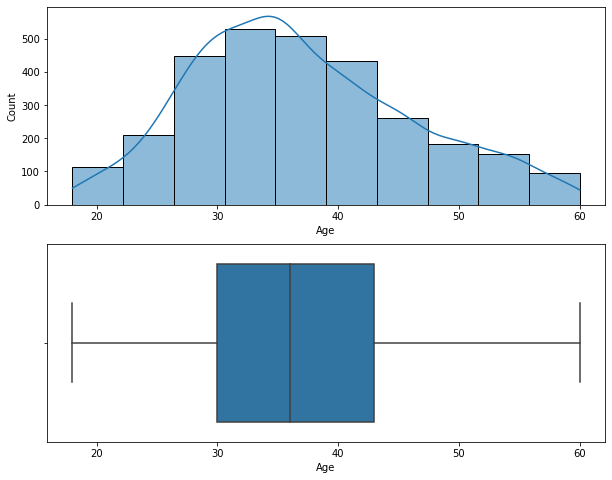

2 DailyRate
DailyRate
jumlah outlier: 0
outlier: []
upper whisker: 1499
lower whisker: 102
skewness: -0.0035149769582910268
data pada kolom DailyRate negative-skewed
p-value: 0.9378245738968809
Data pada kolom DailyRate terdistribusi simetris


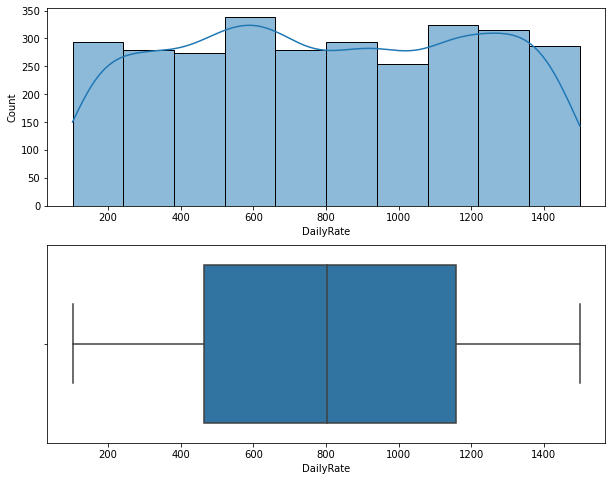

3 DistanceFromHome
DistanceFromHome
jumlah outlier: 0
outlier: []
upper whisker: 29
lower whisker: 1
skewness: 0.9571400469829039
data pada kolom DistanceFromHome positive-skewed
p-value: 3.1023107819184016e-73
Data pada kolom DistanceFromHome terdistribusi asimetris


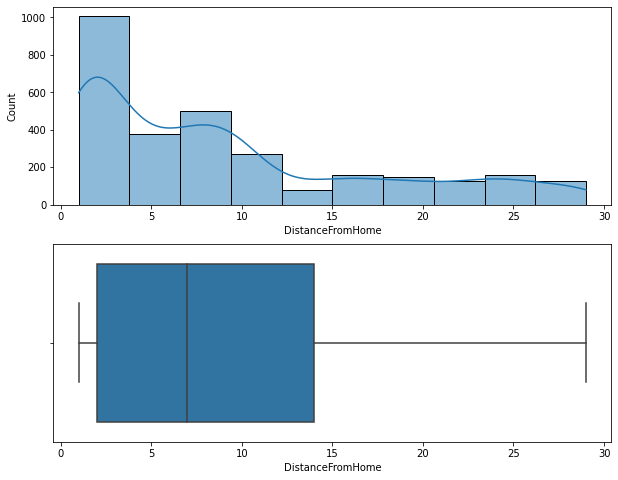

4 Education
Education
jumlah outlier: 0
outlier: []
upper whisker: 5
lower whisker: 1
skewness: -0.2893854052028824
data pada kolom Education negative-skewed
p-value: 3.0620529158836935e-10
Data pada kolom Education terdistribusi asimetris


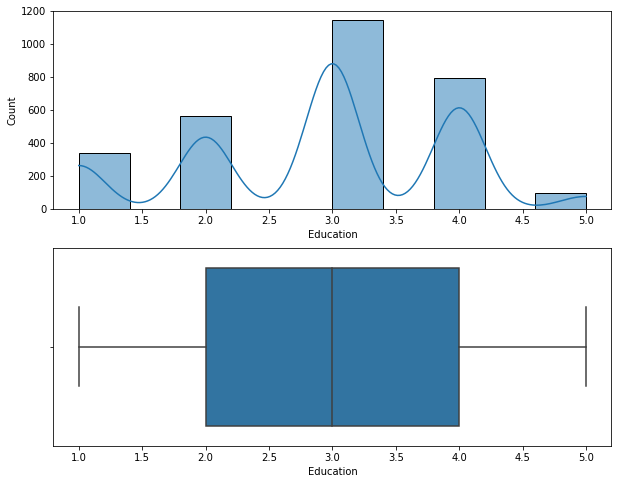

5 EnvironmentSatisfaction
EnvironmentSatisfaction
jumlah outlier: 0
outlier: []
upper whisker: 4
lower whisker: 1
skewness: -0.3213261358382832
data pada kolom EnvironmentSatisfaction negative-skewed
p-value: 3.4072896924386745e-12
Data pada kolom EnvironmentSatisfaction terdistribusi asimetris


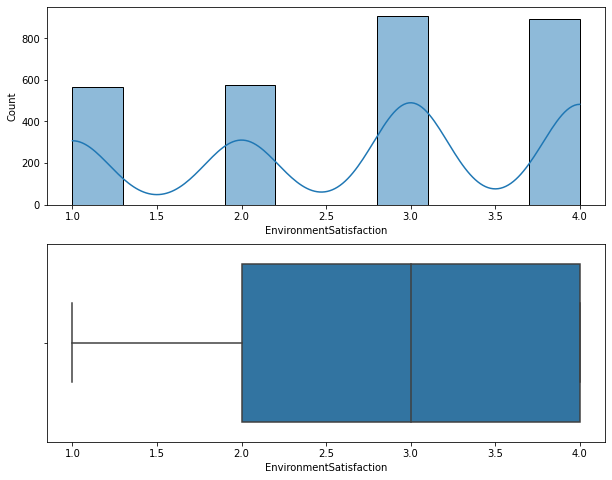

6 HourlyRate
HourlyRate
jumlah outlier: 0
outlier: []
upper whisker: 100
lower whisker: 30
skewness: -0.03227797319055414
data pada kolom HourlyRate negative-skewed
p-value: 0.4739110846945963
Data pada kolom HourlyRate terdistribusi simetris


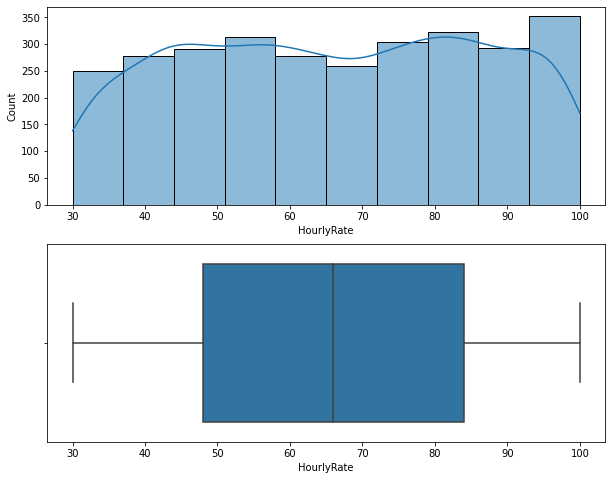

7 JobInvolvement
JobInvolvement
jumlah outlier: 0
outlier: []
upper whisker: 4
lower whisker: 1
skewness: -0.49791062862696706
data pada kolom JobInvolvement negative-skewed
p-value: 1.2772889142432348e-25
Data pada kolom JobInvolvement terdistribusi asimetris


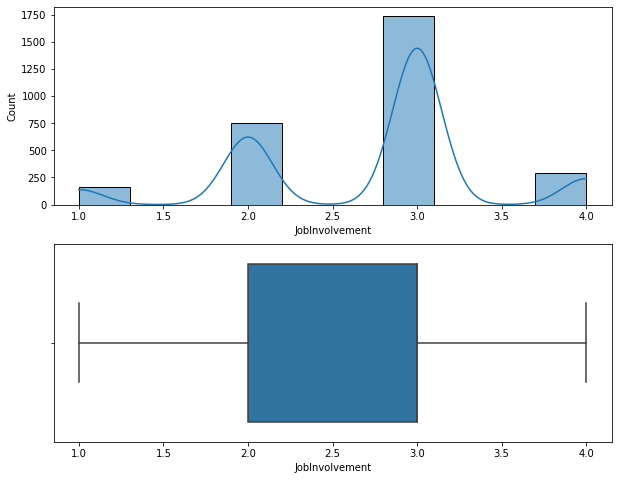

8 JobLevel
JobLevel
jumlah outlier: 0
outlier: []
upper whisker: 5
lower whisker: 1
skewness: 1.0243546583925869
data pada kolom JobLevel positive-skewed
p-value: 6.280041557060713e-81
Data pada kolom JobLevel terdistribusi asimetris


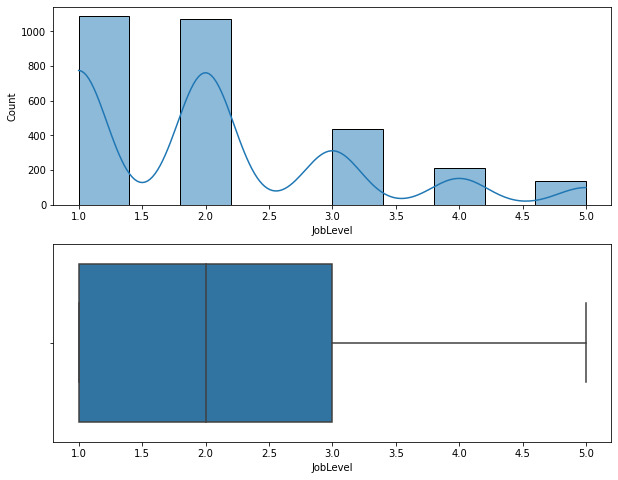

9 JobSatisfaction
JobSatisfaction
jumlah outlier: 0
outlier: []
upper whisker: 4
lower whisker: 1
skewness: -0.3293354633089524
data pada kolom JobSatisfaction negative-skewed
p-value: 1.0406861736329698e-12
Data pada kolom JobSatisfaction terdistribusi asimetris


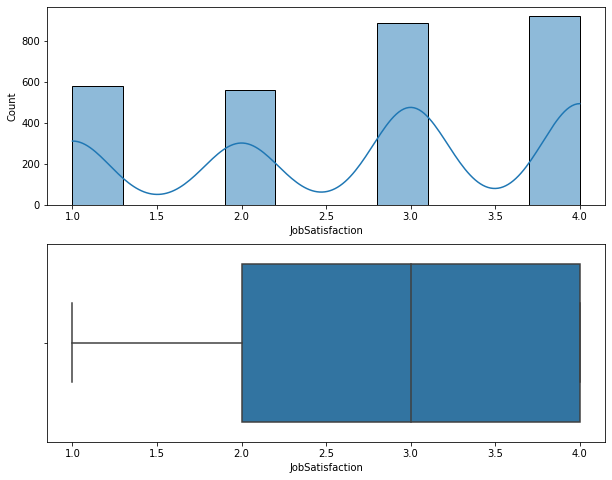

10 MonthlyIncome
MonthlyIncome
jumlah outlier: 228
outlier: [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880, 19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 1

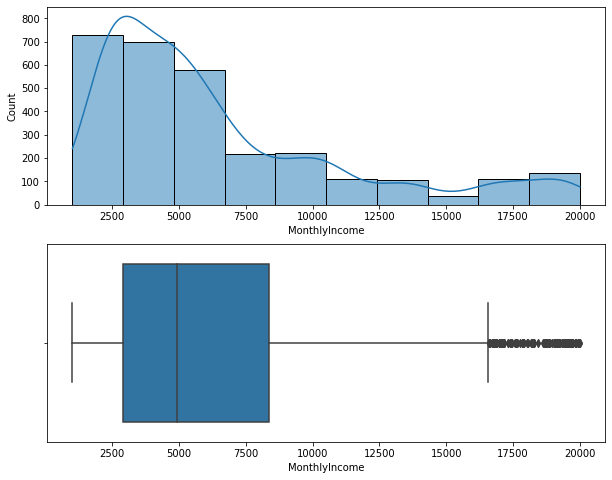

11 MonthlyRate
MonthlyRate
jumlah outlier: 0
outlier: []
upper whisker: 26999
lower whisker: 2094
skewness: 0.01855884556846041
data pada kolom MonthlyRate positive-skewed
p-value: 0.6804684265009102
Data pada kolom MonthlyRate terdistribusi simetris


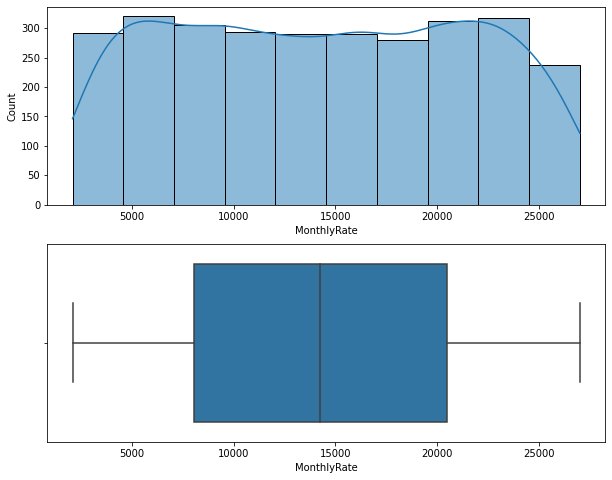

12 NumCompaniesWorked
NumCompaniesWorked
jumlah outlier: 104
outlier: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
upper whisker: 8
lower whisker: 0
skewness: 1.0254233954371303
data pada kolom NumCompaniesWorked positive-skewed
p-value: 4.731639919818368e-81
Data pada kolom NumCompaniesWorked terdistribusi asimetris


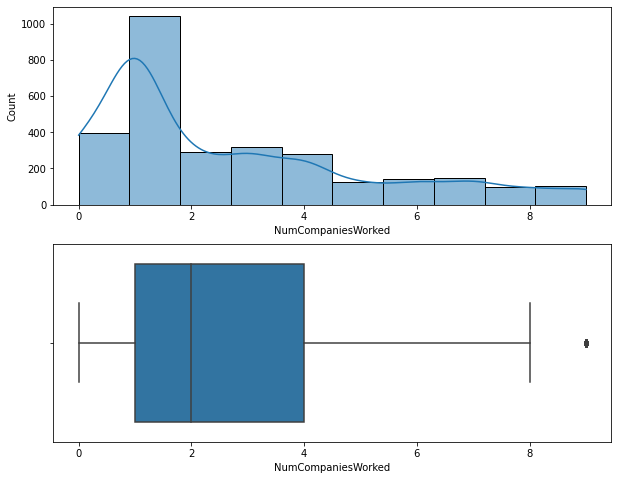

13 PercentSalaryHike
PercentSalaryHike
jumlah outlier: 0
outlier: []
upper whisker: 25
lower whisker: 11
skewness: 0.8202898522796265
data pada kolom PercentSalaryHike positive-skewed
p-value: 6.516948961970625e-58
Data pada kolom PercentSalaryHike terdistribusi asimetris


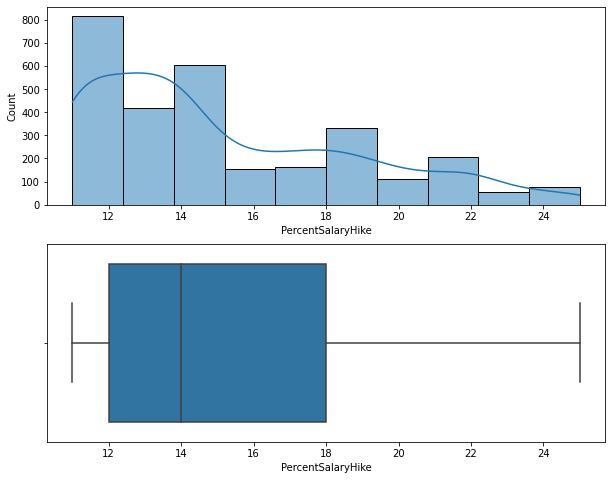

14 PerformanceRating
PerformanceRating
jumlah outlier: 452
outlier: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

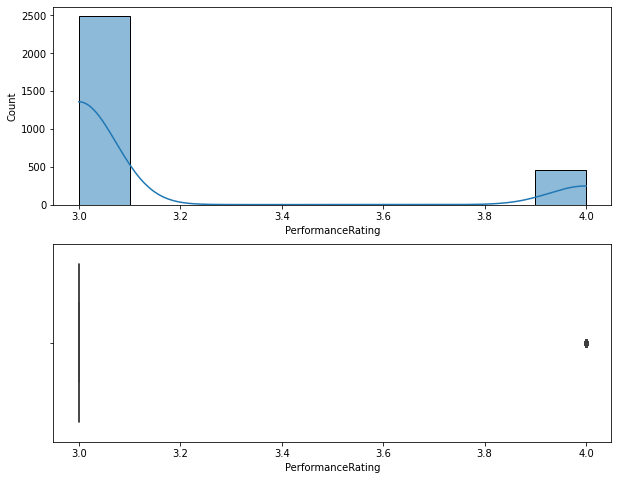

15 RelationshipSatisfaction
RelationshipSatisfaction
jumlah outlier: 0
outlier: []
upper whisker: 4
lower whisker: 1
skewness: -0.3025184698222079
data pada kolom RelationshipSatisfaction negative-skewed
p-value: 5.0406968700948565e-11
Data pada kolom RelationshipSatisfaction terdistribusi asimetris


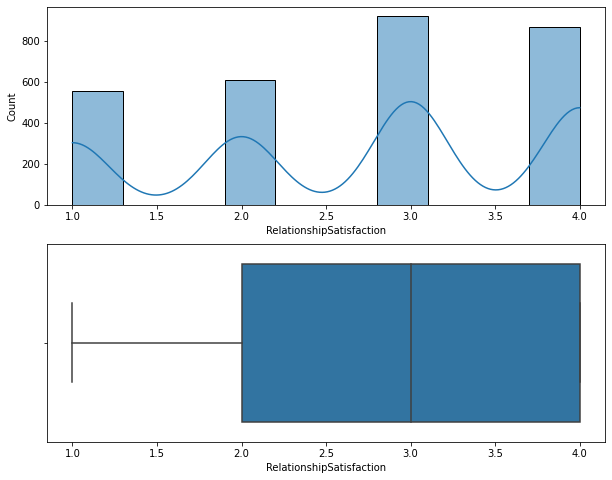

16 StockOptionLevel
StockOptionLevel
jumlah outlier: 170
outlier: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
upper whisker: 2
lower whisker: 0
skewness: 0.9679912809556102
data pada kolom StockOptionLevel positive-skewed
p-value: 1.8003843683669165e-74
Data pada kolom StockOptionLevel terdistribusi asimetris


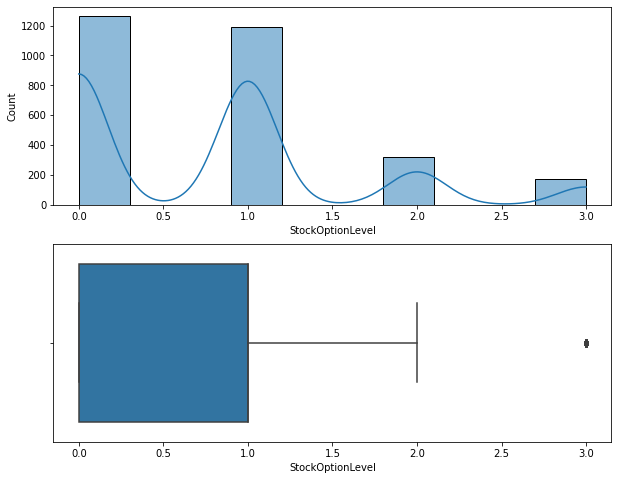

17 TotalWorkingYears
TotalWorkingYears
jumlah outlier: 126
outlier: [31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 30, 36, 31, 33, 32, 37, 31, 32, 32, 30, 34, 30, 40, 29, 35, 31, 33, 31, 29, 32, 30, 33, 30, 29, 31, 32, 33, 36, 34, 31, 36, 33, 31, 29, 33, 29, 32, 31, 35, 29, 32, 34, 36, 32, 30, 36, 29, 34, 37, 29, 29, 35, 31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 30, 36, 31, 33, 32, 37, 31, 32, 32, 30, 34, 30, 40, 29, 35, 31, 33, 31, 29, 32, 30, 33, 30, 29, 31, 32, 33, 36, 34, 31, 36, 33, 31, 29, 33, 29, 32, 31, 35, 29, 32, 34, 36, 32, 30, 36, 29, 34, 37, 29, 29, 35]
upper whisker: 28
lower whisker: 0
skewness: 1.11603155825941
data pada kolom TotalWorkingYears positive-skewed
p-value: 1.5884922366175207e-91
Data pada kolom TotalWorkingYears terdistribusi asimetris


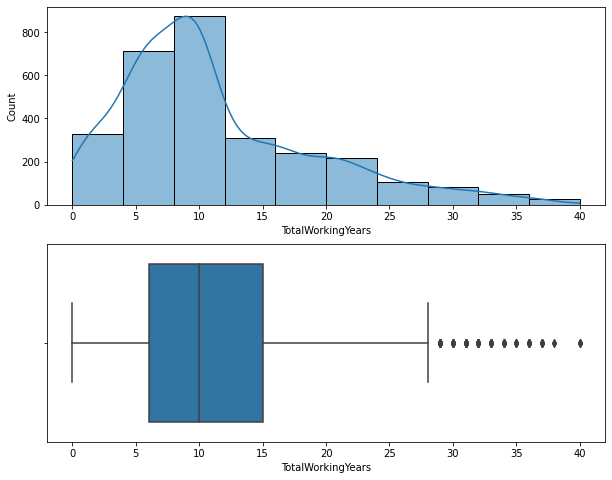

18 TrainingTimesLastYear
TrainingTimesLastYear
jumlah outlier: 476
outlier: [0, 5, 5, 5, 6, 5, 5, 5, 6, 6, 0, 0, 0, 5, 0, 5, 5, 5, 6, 6, 5, 0, 6, 5, 5, 0, 5, 5, 6, 5, 5, 5, 0, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 0, 0, 5, 5, 5, 6, 6, 5, 0, 5, 0, 5, 5, 0, 6, 0, 5, 5, 6, 6, 5, 6, 5, 0, 5, 5, 5, 5, 0, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 0, 5, 0, 5, 5, 6, 5, 6, 5, 0, 5, 5, 0, 6, 6, 5, 6, 0, 5, 0, 6, 6, 6, 6, 5, 5, 0, 5, 0, 0, 6, 0, 6, 5, 6, 5, 5, 0, 5, 6, 6, 5, 5, 0, 0, 6, 0, 0, 5, 0, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 0, 6, 6, 5, 5, 0, 0, 6, 6, 0, 5, 0, 0, 0, 0, 0, 5, 5, 6, 5, 5, 0, 5, 5, 0, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 0, 0, 5, 5, 5, 5, 6, 0, 0, 6, 6, 6, 6, 5, 5, 5, 6, 5, 0, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 0, 5, 5, 5, 5, 5, 0, 0, 0, 6, 5, 6, 6, 5, 6, 0, 6, 6, 5, 6, 6, 5, 5, 5, 0, 0, 5, 5, 5, 6, 5, 5, 5, 6, 6, 0, 0, 0, 5, 0, 5, 5, 5, 6, 6, 5, 0, 6, 5, 5, 0, 5, 5, 6, 5, 5, 5, 0, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 0, 0, 5, 5, 5, 6, 6, 5, 0, 5, 0, 5, 5, 0, 6, 0, 5, 5, 6, 6, 5, 6, 5, 0, 5, 5, 5,

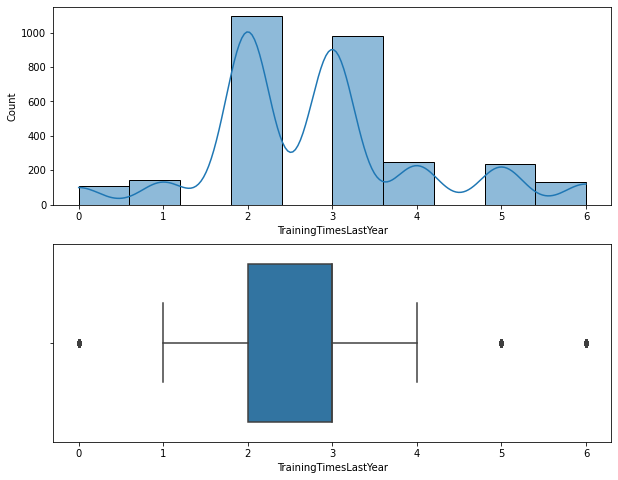

19 WorkLifeBalance
WorkLifeBalance
jumlah outlier: 0
outlier: []
upper whisker: 4
lower whisker: 1
skewness: -0.5519163838185224
data pada kolom WorkLifeBalance negative-skewed
p-value: 1.8185197151995864e-30
Data pada kolom WorkLifeBalance terdistribusi asimetris


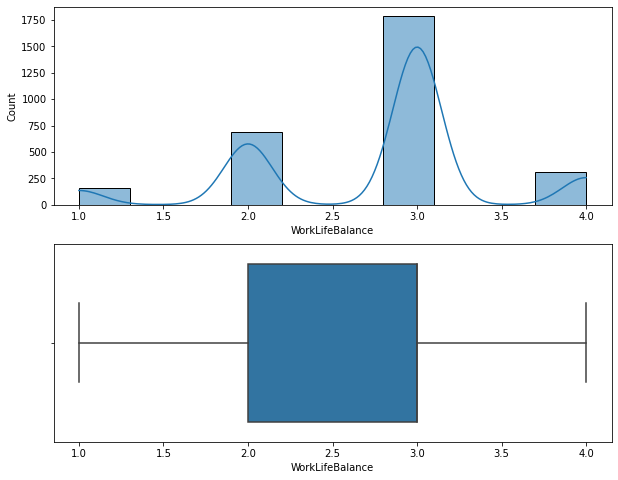

20 YearsAtCompany
YearsAtCompany
jumlah outlier: 208
outlier: [25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 24, 20, 24, 33, 20, 19, 22, 33, 24, 19, 21, 20, 36, 20, 20, 22, 24, 21, 21, 25, 21, 29, 20, 27, 20, 31, 32, 20, 20, 21, 22, 22, 34, 24, 26, 31, 20, 31, 26, 19, 21, 21, 32, 21, 19, 20, 22, 20, 21, 26, 20, 22, 24, 33, 29, 25, 21, 19, 19, 20, 19, 33, 19, 19, 20, 20, 20, 20, 20, 32, 20, 21, 33, 36, 26, 30, 22, 23, 23, 21, 21, 22, 22, 19, 22, 19, 22, 20, 20, 20, 22, 20, 20, 25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 24, 20, 24, 33, 20, 19, 22, 33, 24, 19, 21, 20, 36, 20, 20, 22, 24, 21, 21, 25, 21, 29, 20, 27, 20, 31, 32, 20, 20, 21, 22, 22, 34, 24, 26, 31, 20, 31, 26, 19, 21, 21, 32, 21, 19, 20, 22, 20, 21, 26, 20, 22, 24, 33, 29, 25, 21, 19, 19, 20, 19, 33, 19, 19, 20, 20, 20, 20, 20, 32, 20, 21, 33, 36, 26, 30, 22, 23, 23, 21, 21, 22, 22, 19, 22, 19, 22, 20, 20, 20, 22, 20, 20]
upper whisker: 18
lower whisker: 0
skewness: 1.7627284034822992
data pada kolom YearsAtCompany positive-s

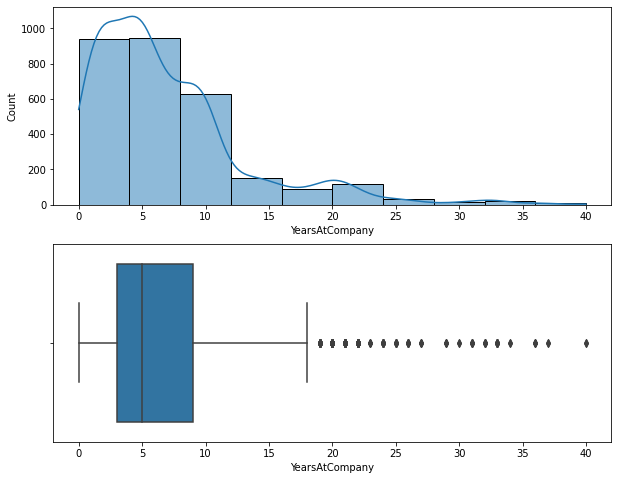

21 YearsInCurrentRole
YearsInCurrentRole
jumlah outlier: 42
outlier: [15, 16, 18, 15, 18, 17, 16, 15, 16, 15, 16, 16, 15, 16, 17, 15, 15, 15, 17, 17, 16, 15, 16, 18, 15, 18, 17, 16, 15, 16, 15, 16, 16, 15, 16, 17, 15, 15, 15, 17, 17, 16]
upper whisker: 14
lower whisker: 0
skewness: 0.9164268059808774
data pada kolom YearsInCurrentRole positive-skewed
p-value: 1.2776855008203247e-68
Data pada kolom YearsInCurrentRole terdistribusi asimetris


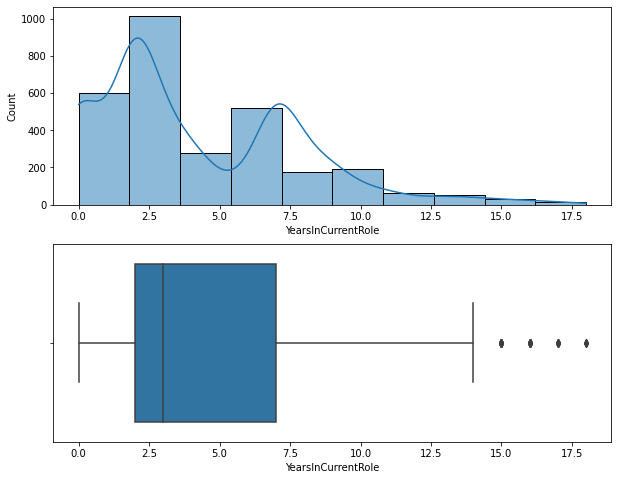

22 YearsSinceLastPromotion
YearsSinceLastPromotion
jumlah outlier: 214
outlier: [8, 15, 8, 8, 9, 13, 12, 10, 11, 9, 12, 15, 15, 15, 9, 11, 11, 9, 12, 11, 15, 11, 10, 9, 11, 9, 8, 11, 11, 8, 13, 9, 9, 12, 10, 11, 15, 13, 9, 11, 10, 8, 8, 11, 9, 11, 12, 11, 14, 13, 14, 8, 11, 15, 10, 11, 11, 15, 11, 13, 11, 13, 15, 8, 13, 15, 11, 14, 15, 15, 9, 11, 9, 8, 9, 15, 11, 12, 9, 8, 10, 14, 8, 13, 13, 12, 14, 8, 8, 8, 14, 14, 8, 12, 13, 14, 14, 12, 11, 8, 11, 9, 12, 8, 9, 11, 9, 8, 15, 8, 8, 9, 13, 12, 10, 11, 9, 12, 15, 15, 15, 9, 11, 11, 9, 12, 11, 15, 11, 10, 9, 11, 9, 8, 11, 11, 8, 13, 9, 9, 12, 10, 11, 15, 13, 9, 11, 10, 8, 8, 11, 9, 11, 12, 11, 14, 13, 14, 8, 11, 15, 10, 11, 11, 15, 11, 13, 11, 13, 15, 8, 13, 15, 11, 14, 15, 15, 9, 11, 9, 8, 9, 15, 11, 12, 9, 8, 10, 14, 8, 13, 13, 12, 14, 8, 8, 8, 14, 14, 8, 12, 13, 14, 14, 12, 11, 8, 11, 9, 12, 8, 9, 11, 9]
upper whisker: 7
lower whisker: 0
skewness: 1.9822646234628944
data pada kolom YearsSinceLastPromotion positive-skewed
p-value: 4.989

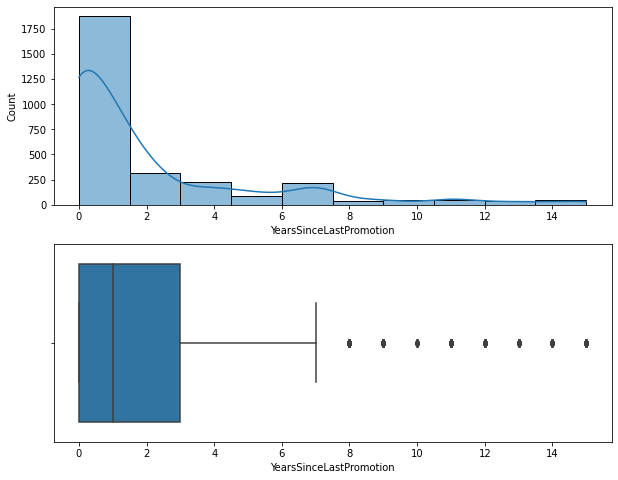

23 YearsWithCurrManager
YearsWithCurrManager
jumlah outlier: 28
outlier: [17, 15, 15, 15, 15, 17, 16, 17, 15, 17, 17, 17, 17, 16, 17, 15, 15, 15, 15, 17, 16, 17, 15, 17, 17, 17, 17, 16]
upper whisker: 14
lower whisker: 0
skewness: 0.832600290620938
data pada kolom YearsWithCurrManager positive-skewed
p-value: 2.8881104371329895e-59
Data pada kolom YearsWithCurrManager terdistribusi asimetris


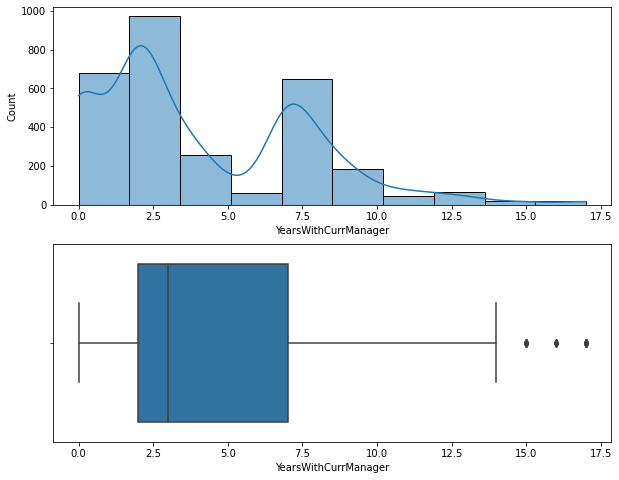

In [18]:
for count, col in enumerate(employee_used_num.columns):
    print(count + 1, col)
    analyze_visualize(employee_used_num, col)
    print("="*50)

(2) Lakukan EDA univariat untuk setiap kolom kategorikal pada employee.csv yang mencakup:<p>
    a. countplot untuk tiap kolom<p>
    b. jumlah kategori unik, daftar kategori unik dan value counts tiap kategori unik<p>

1 Attrition


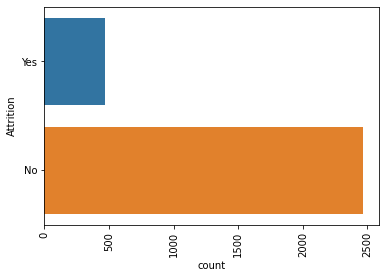

Jumlah kategori unik: 2
No     2466
Yes     474
Name: Attrition, dtype: int64
**************************************************
2 BusinessTravel


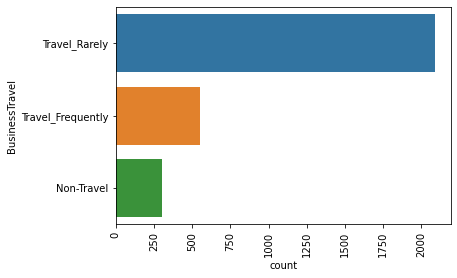

Jumlah kategori unik: 3
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
**************************************************
3 Department


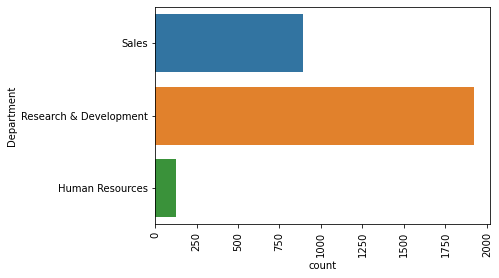

Jumlah kategori unik: 3
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
**************************************************
4 EducationField


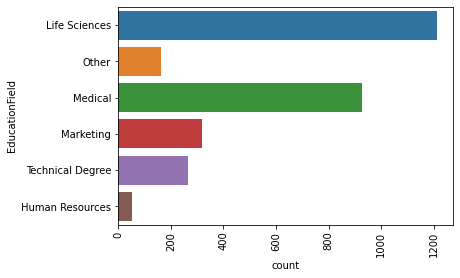

Jumlah kategori unik: 6
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
**************************************************
5 Gender


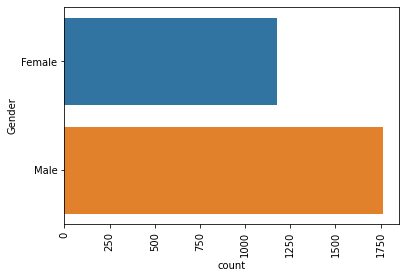

Jumlah kategori unik: 2
Male      1764
Female    1176
Name: Gender, dtype: int64
**************************************************
6 JobRole


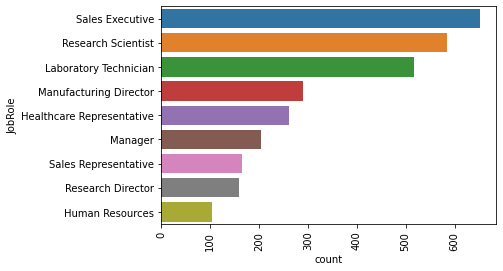

Jumlah kategori unik: 9
Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64
**************************************************
7 MaritalStatus


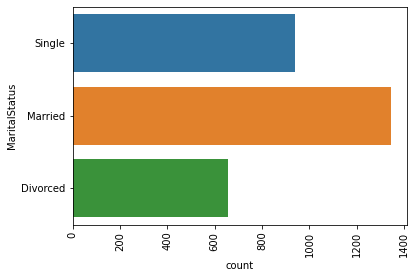

Jumlah kategori unik: 3
Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64
**************************************************
8 OverTime


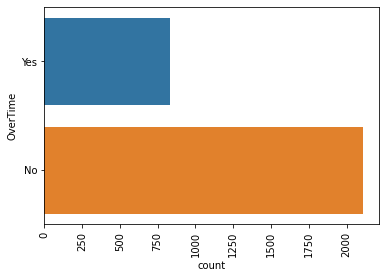

Jumlah kategori unik: 2
No     2108
Yes     832
Name: OverTime, dtype: int64
**************************************************


In [19]:
for count,col in enumerate(employee_used_obj.columns):
    print(count + 1, col)
    sns.countplot(data=employee_used_obj, y=col)
    plt.xticks(rotation = 90)
    plt.show()
    print(f"Jumlah kategori unik: {len(employee_used_obj[col].unique())}")
    print(employee_used_obj[col].value_counts())
    print("*"*50)

(3) Lakukan EDA multivariat untuk tiap pasangan kolom numerik-numerik pada employee.csv yang mencakup:<p>
    a. regplot antar kolom numerik<p>
        b. lakukan normal test pada kedua variabel <p>
        c. apabila kedua variabel berasal dari populasi normal hitung koefisien korelasi pearson bersama p-value nya <p>
        d. apabila kedua variabel tidak berasal dari populasi normal hitung koefisien korelasi spearman bersama p-value nya

1 Regplot Age-DailyRate


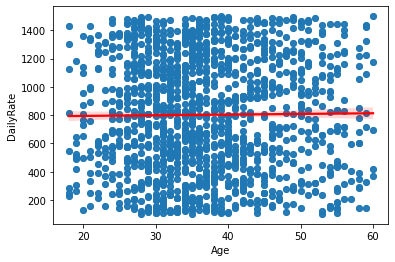

SpearmanrResult(correlation=0.007289728044117844, pvalue=0.69276975518985)
************************************************************
2 Regplot Age-DistanceFromHome


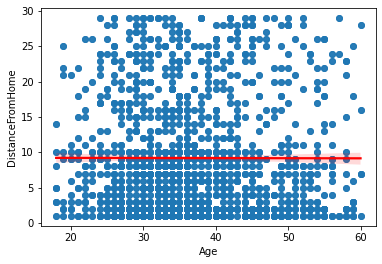

SpearmanrResult(correlation=-0.019290910985248558, pvalue=0.2957273838455554)
************************************************************
3 Regplot Age-Education


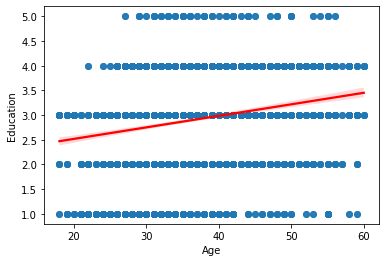

SpearmanrResult(correlation=0.20493668426294695, pvalue=3.0166162648148966e-29)
************************************************************
4 Regplot Age-EnvironmentSatisfaction


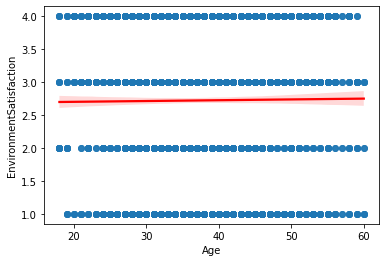

SpearmanrResult(correlation=0.00982011553441057, pvalue=0.5945525694494938)
************************************************************
5 Regplot Age-HourlyRate


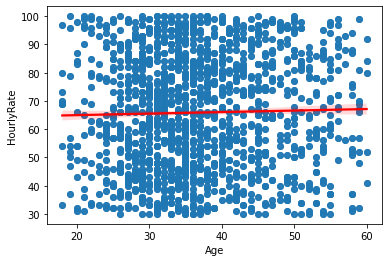

SpearmanrResult(correlation=0.02885848516353823, pvalue=0.11771933282331203)
************************************************************
6 Regplot Age-JobInvolvement


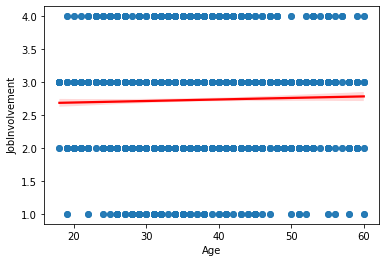

SpearmanrResult(correlation=0.034456224000108115, pvalue=0.06175684283247481)
************************************************************
7 Regplot Age-JobLevel


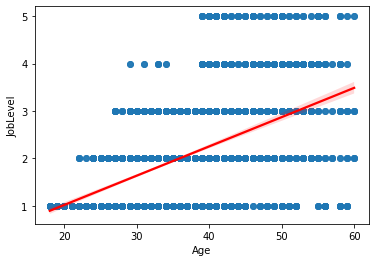

SpearmanrResult(correlation=0.48961781089554174, pvalue=4.197797534699224e-177)
************************************************************
8 Regplot Age-JobSatisfaction


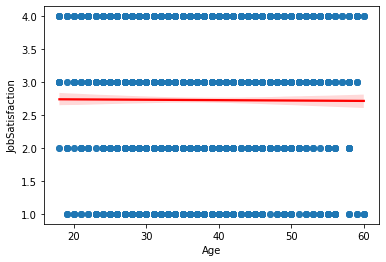

SpearmanrResult(correlation=-0.005184852121396131, pvalue=0.7786995243634464)
************************************************************
9 Regplot Age-MonthlyIncome


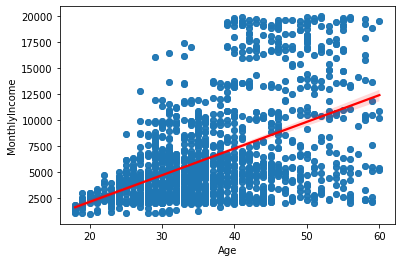

SpearmanrResult(correlation=0.471902130232714, pvalue=5.958563375943627e-163)
************************************************************
10 Regplot Age-MonthlyRate


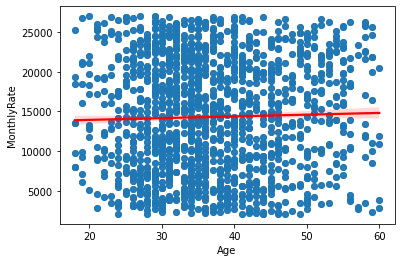

SpearmanrResult(correlation=0.01745100080296337, pvalue=0.34420278907629775)
************************************************************
11 Regplot Age-NumCompaniesWorked


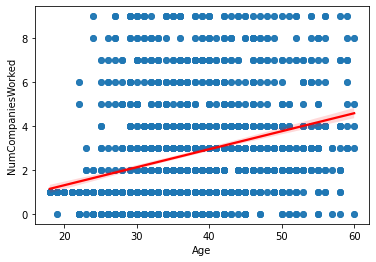

SpearmanrResult(correlation=0.35321263079158877, pvalue=4.019902478455891e-87)
************************************************************
12 Regplot Age-PercentSalaryHike


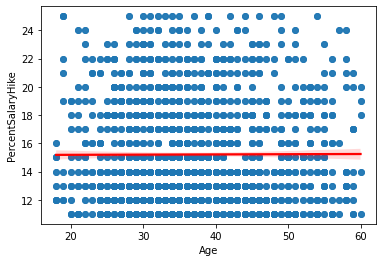

SpearmanrResult(correlation=0.007708837983941598, pvalue=0.6760821832195099)
************************************************************
13 Regplot Age-PerformanceRating


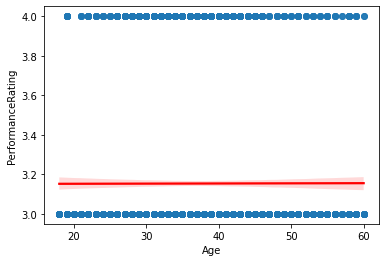

SpearmanrResult(correlation=9.338863125535507e-05, pvalue=0.9959614900327622)
************************************************************
14 Regplot Age-RelationshipSatisfaction


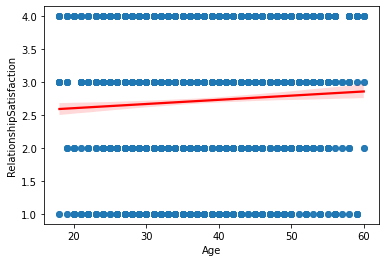

SpearmanrResult(correlation=0.046063319903500696, pvalue=0.012493201128485756)
************************************************************
15 Regplot Age-StockOptionLevel


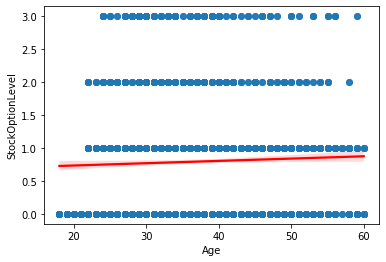

SpearmanrResult(correlation=0.056633063475323084, pvalue=0.0021269781245761977)
************************************************************
16 Regplot Age-TotalWorkingYears


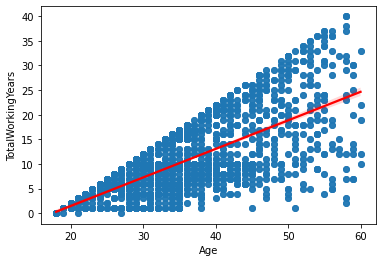

SpearmanrResult(correlation=0.656895823213162, pvalue=0.0)
************************************************************
17 Regplot Age-TrainingTimesLastYear


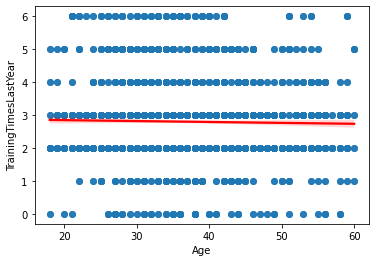

SpearmanrResult(correlation=0.00031580491694933107, pvalue=0.9863438997746217)
************************************************************
18 Regplot Age-WorkLifeBalance


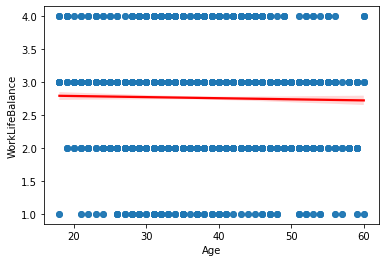

SpearmanrResult(correlation=-0.003706791003682171, pvalue=0.8407736582563284)
************************************************************
19 Regplot Age-YearsAtCompany


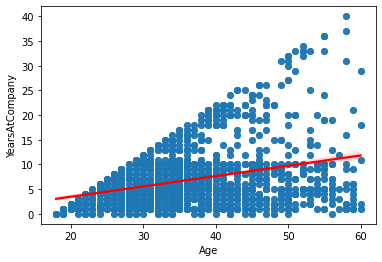

SpearmanrResult(correlation=0.2516859699509598, pvalue=1.034692983288091e-43)
************************************************************
20 Regplot Age-YearsInCurrentRole


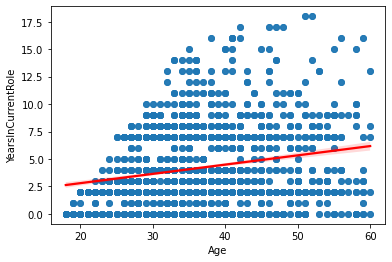

SpearmanrResult(correlation=0.19797756100400973, pvalue=2.2846795631417662e-27)
************************************************************
21 Regplot Age-YearsSinceLastPromotion


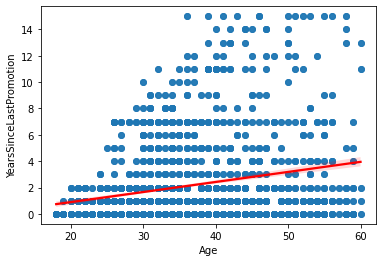

SpearmanrResult(correlation=0.1736472238168011, pvalue=2.4568908440880162e-21)
************************************************************
22 Regplot Age-YearsWithCurrManager


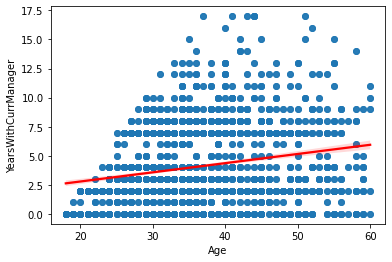

SpearmanrResult(correlation=0.19481758412797953, pvalue=1.5464671218207152e-26)
************************************************************
23 Regplot DailyRate-DistanceFromHome


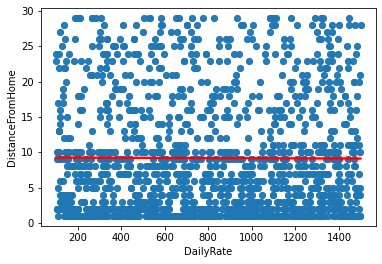

SpearmanrResult(correlation=-0.0027536667797074072, pvalue=0.8813599442132525)
************************************************************
24 Regplot DailyRate-Education


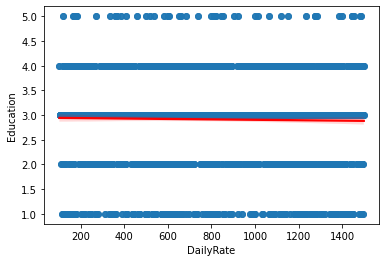

SpearmanrResult(correlation=-0.013607132107227618, pvalue=0.4608042806386452)
************************************************************
25 Regplot DailyRate-EnvironmentSatisfaction


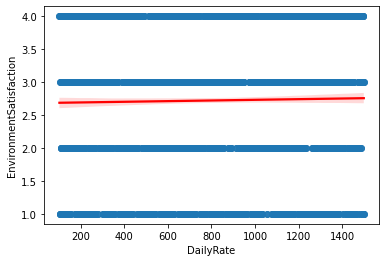

SpearmanrResult(correlation=0.01896119181352265, pvalue=0.30406061698263015)
************************************************************
26 Regplot DailyRate-HourlyRate


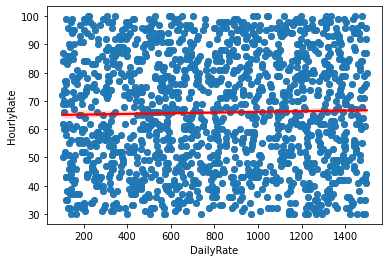

SpearmanrResult(correlation=0.023511433281152457, pvalue=0.2024984962077429)
************************************************************
27 Regplot DailyRate-JobInvolvement


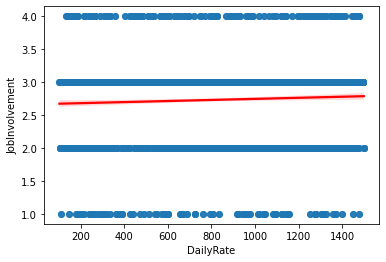

SpearmanrResult(correlation=0.04246878184735499, pvalue=0.021290546226160847)
************************************************************
28 Regplot DailyRate-JobLevel


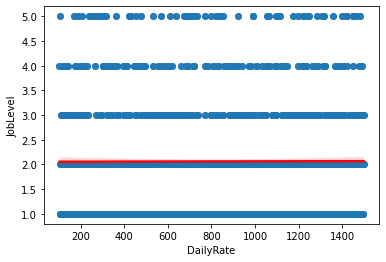

SpearmanrResult(correlation=0.003816355156729909, pvalue=0.8361330391549409)
************************************************************
29 Regplot DailyRate-JobSatisfaction


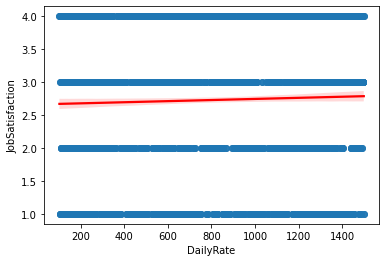

SpearmanrResult(correlation=0.027828761662227978, pvalue=0.13140740114615457)
************************************************************
30 Regplot DailyRate-MonthlyIncome


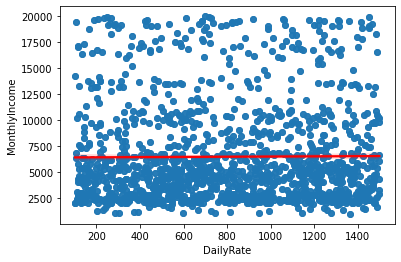

SpearmanrResult(correlation=0.016259651841387765, pvalue=0.37814984297348164)
************************************************************
31 Regplot DailyRate-MonthlyRate


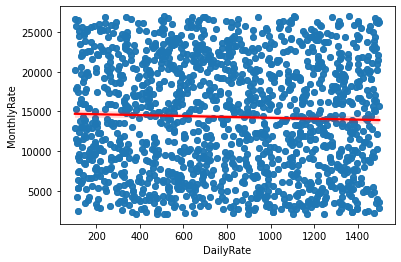

SpearmanrResult(correlation=-0.03235951997245843, pvalue=0.07937849838748814)
************************************************************
32 Regplot DailyRate-NumCompaniesWorked


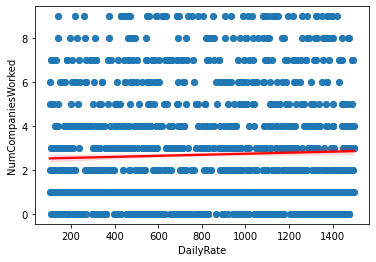

SpearmanrResult(correlation=0.036548345445756136, pvalue=0.047531293163970534)
************************************************************
33 Regplot DailyRate-PercentSalaryHike


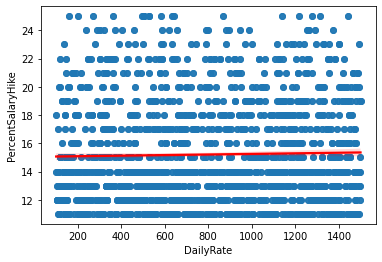

SpearmanrResult(correlation=0.02507040343270031, pvalue=0.17414751306837023)
************************************************************
34 Regplot DailyRate-PerformanceRating


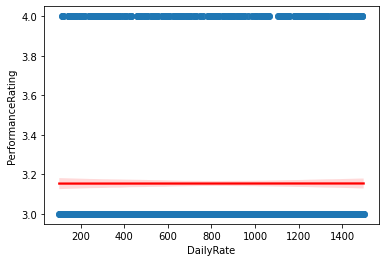

SpearmanrResult(correlation=0.0006244328586809105, pvalue=0.9730019812965637)
************************************************************
35 Regplot DailyRate-RelationshipSatisfaction


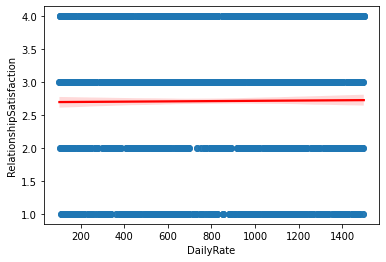

SpearmanrResult(correlation=0.00968452835360801, pvalue=0.5996518466374775)
************************************************************
36 Regplot DailyRate-StockOptionLevel


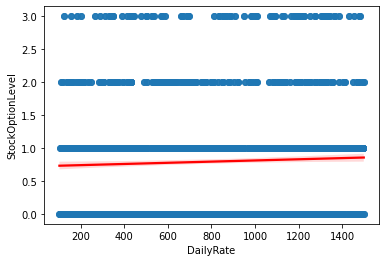

SpearmanrResult(correlation=0.03851393353444212, pvalue=0.03678158362557222)
************************************************************
37 Regplot DailyRate-TotalWorkingYears


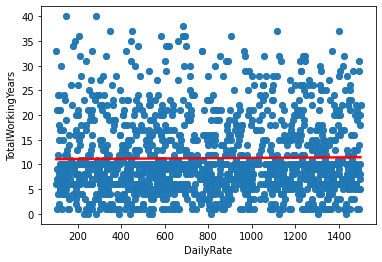

SpearmanrResult(correlation=0.020950699420673024, pvalue=0.25611333476124437)
************************************************************
38 Regplot DailyRate-TrainingTimesLastYear


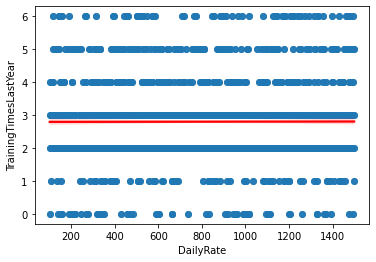

SpearmanrResult(correlation=-0.011338974540025925, pvalue=0.5388337537260395)
************************************************************
39 Regplot DailyRate-WorkLifeBalance


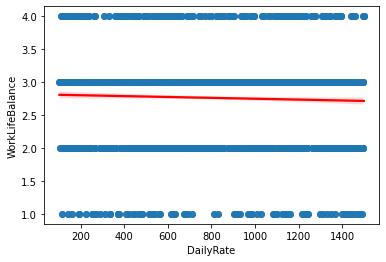

SpearmanrResult(correlation=-0.040352314887821934, pvalue=0.028674375718448306)
************************************************************
40 Regplot DailyRate-YearsAtCompany


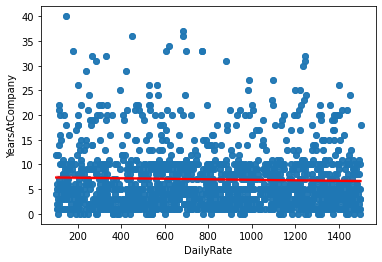

SpearmanrResult(correlation=-0.009778343947306216, pvalue=0.5961214390317586)
************************************************************
41 Regplot DailyRate-YearsInCurrentRole


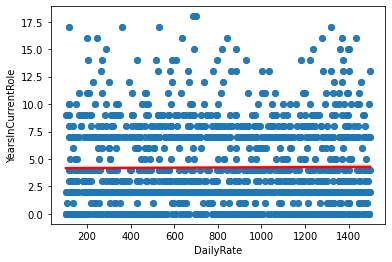

SpearmanrResult(correlation=0.007207538803194541, pvalue=0.6960601233788736)
************************************************************
42 Regplot DailyRate-YearsSinceLastPromotion


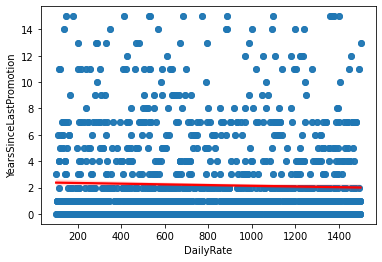

SpearmanrResult(correlation=-0.037631293170119644, pvalue=0.041321436013887984)
************************************************************
43 Regplot DailyRate-YearsWithCurrManager


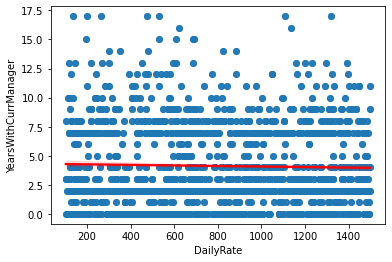

SpearmanrResult(correlation=-0.004716518904715812, pvalue=0.7982360441112056)
************************************************************
44 Regplot DistanceFromHome-Education


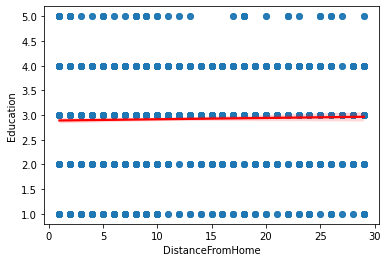

SpearmanrResult(correlation=0.015708004968988647, pvalue=0.3945437973287915)
************************************************************
45 Regplot DistanceFromHome-EnvironmentSatisfaction


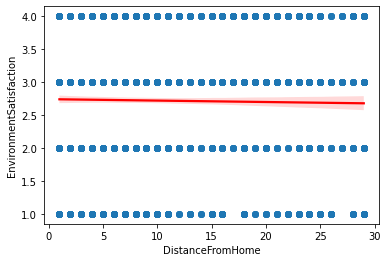

SpearmanrResult(correlation=-0.010400913109934545, pvalue=0.5729370067043138)
************************************************************
46 Regplot DistanceFromHome-HourlyRate


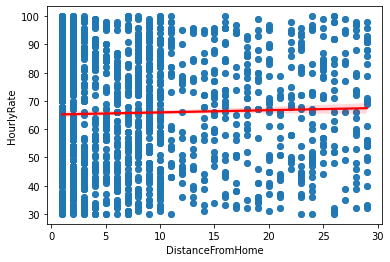

SpearmanrResult(correlation=0.02044590781925942, pvalue=0.26775056163439825)
************************************************************
47 Regplot DistanceFromHome-JobInvolvement


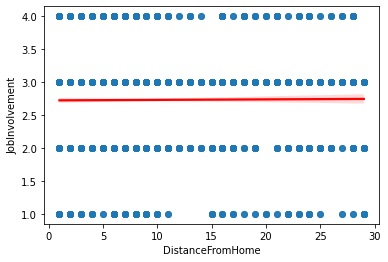

SpearmanrResult(correlation=0.03443007005503541, pvalue=0.06195484919342414)
************************************************************
48 Regplot DistanceFromHome-JobLevel


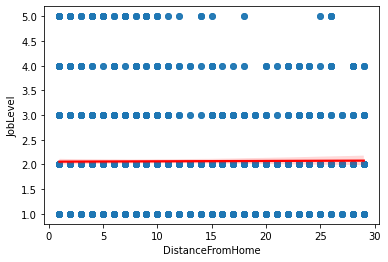

SpearmanrResult(correlation=0.02214760710484909, pvalue=0.22993785618825993)
************************************************************
49 Regplot DistanceFromHome-JobSatisfaction


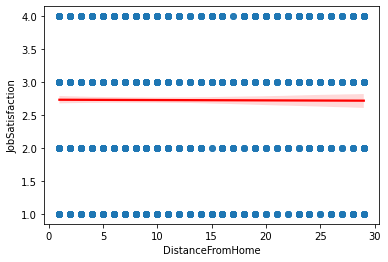

SpearmanrResult(correlation=-0.013078054042407583, pvalue=0.47842131740786964)
************************************************************
50 Regplot DistanceFromHome-MonthlyIncome


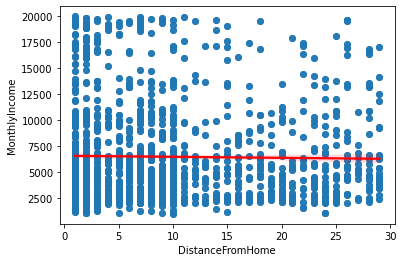

SpearmanrResult(correlation=0.002512448420823388, pvalue=0.8916855663272147)
************************************************************
51 Regplot DistanceFromHome-MonthlyRate


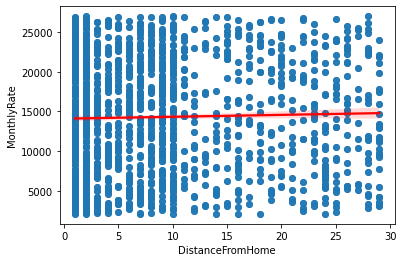

SpearmanrResult(correlation=0.03961780522063657, pvalue=0.03170762387551838)
************************************************************
52 Regplot DistanceFromHome-NumCompaniesWorked


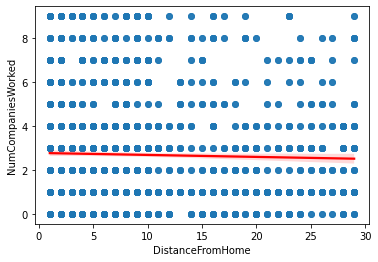

SpearmanrResult(correlation=-0.00959187700056381, pvalue=0.6031476986453712)
************************************************************
53 Regplot DistanceFromHome-PercentSalaryHike


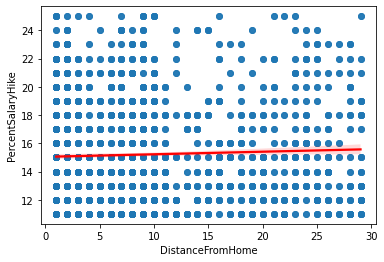

SpearmanrResult(correlation=0.029666427948417493, pvalue=0.10778349200812928)
************************************************************
54 Regplot DistanceFromHome-PerformanceRating


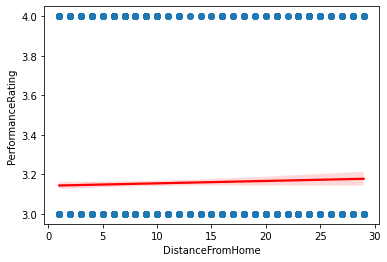

SpearmanrResult(correlation=0.011319673780960831, pvalue=0.5395250544794351)
************************************************************
55 Regplot DistanceFromHome-RelationshipSatisfaction


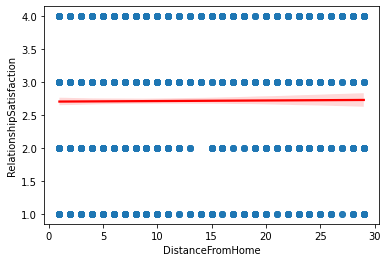

SpearmanrResult(correlation=0.005851811211412193, pvalue=0.7511196748937004)
************************************************************
56 Regplot DistanceFromHome-StockOptionLevel


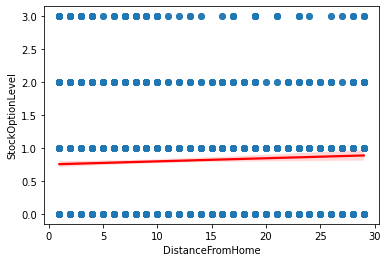

SpearmanrResult(correlation=0.03019029429227645, pvalue=0.1017040373103863)
************************************************************
57 Regplot DistanceFromHome-TotalWorkingYears


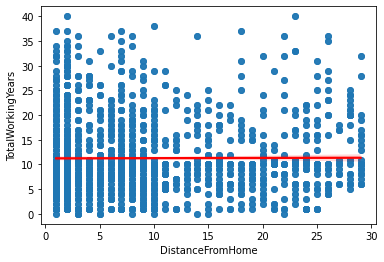

SpearmanrResult(correlation=-0.0029123746354370135, pvalue=0.8745771418242629)
************************************************************
58 Regplot DistanceFromHome-TrainingTimesLastYear


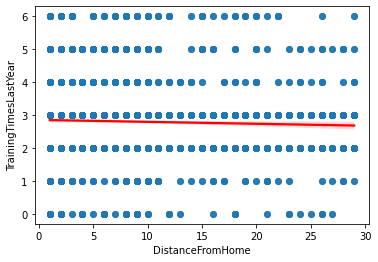

SpearmanrResult(correlation=-0.024848360913254746, pvalue=0.17799406943715157)
************************************************************
59 Regplot DistanceFromHome-WorkLifeBalance


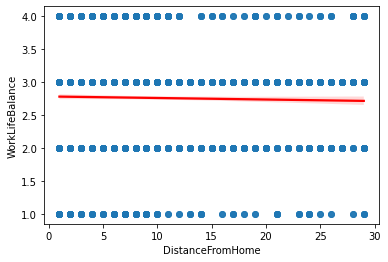

SpearmanrResult(correlation=-0.020401886909142356, pvalue=0.2687823488602647)
************************************************************
60 Regplot DistanceFromHome-YearsAtCompany


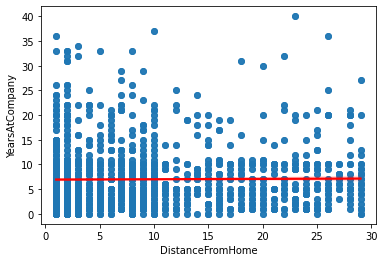

SpearmanrResult(correlation=0.01051309493489628, pvalue=0.5688052718091519)
************************************************************
61 Regplot DistanceFromHome-YearsInCurrentRole


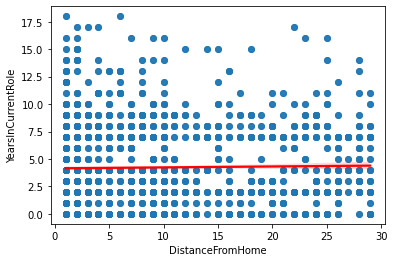

SpearmanrResult(correlation=0.01370809637131024, pvalue=0.4574840829846717)
************************************************************
62 Regplot DistanceFromHome-YearsSinceLastPromotion


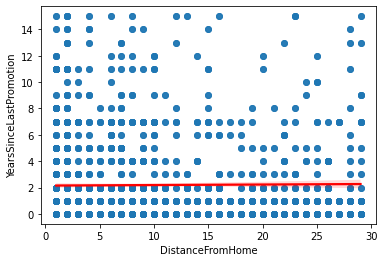

SpearmanrResult(correlation=-0.004685210833973205, pvalue=0.799546723793586)
************************************************************
63 Regplot DistanceFromHome-YearsWithCurrManager


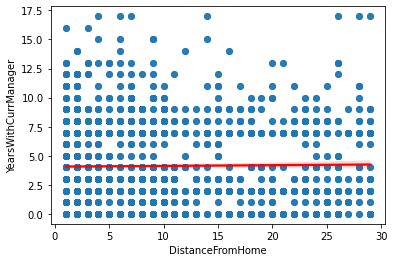

SpearmanrResult(correlation=0.004447867974834503, pvalue=0.8095009460299484)
************************************************************
64 Regplot Education-EnvironmentSatisfaction


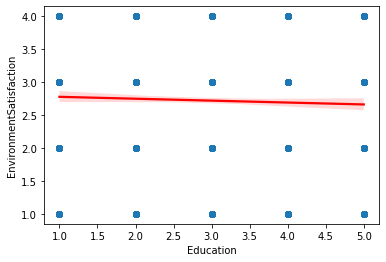

SpearmanrResult(correlation=-0.027624689628706536, pvalue=0.13426105317751913)
************************************************************
65 Regplot Education-HourlyRate


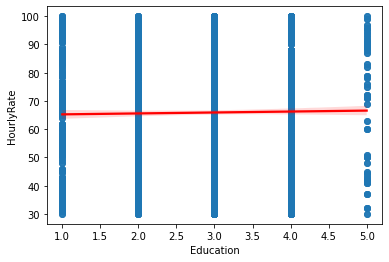

SpearmanrResult(correlation=0.014431900253602338, pvalue=0.43407877358670965)
************************************************************
66 Regplot Education-JobInvolvement


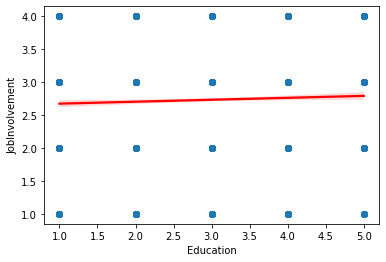

SpearmanrResult(correlation=0.037230796703121516, pvalue=0.04353287713536371)
************************************************************
67 Regplot Education-JobLevel


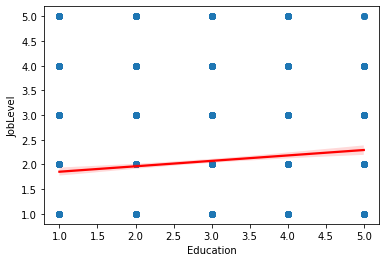

SpearmanrResult(correlation=0.10741916381028464, pvalue=5.255257573793144e-09)
************************************************************
68 Regplot Education-JobSatisfaction


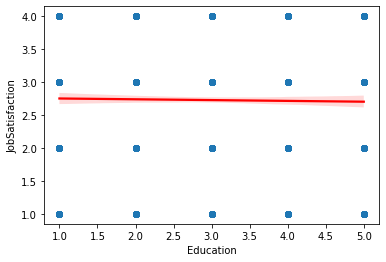

SpearmanrResult(correlation=-0.005175468670271538, pvalue=0.7790896311104079)
************************************************************
69 Regplot Education-MonthlyIncome


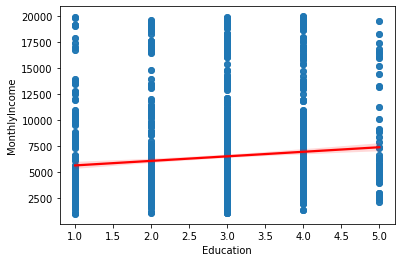

SpearmanrResult(correlation=0.12002849135771107, pvalue=6.620800098369639e-11)
************************************************************
70 Regplot Education-MonthlyRate


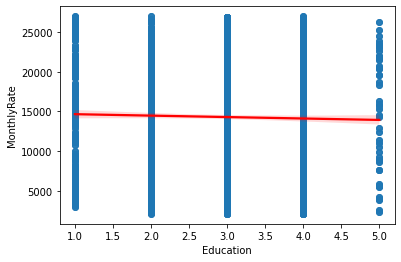

SpearmanrResult(correlation=-0.021213827767731237, pvalue=0.25018857618035595)
************************************************************
71 Regplot Education-NumCompaniesWorked


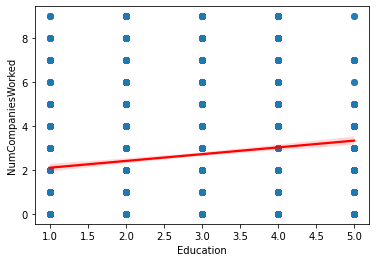

SpearmanrResult(correlation=0.13510337535063993, pvalue=1.892507969764383e-13)
************************************************************
72 Regplot Education-PercentSalaryHike


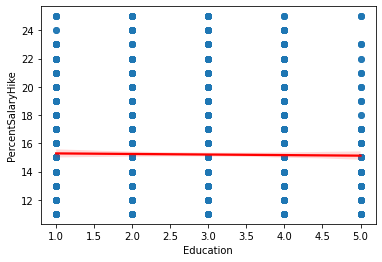

SpearmanrResult(correlation=0.004299935630355092, pvalue=0.8157209986324607)
************************************************************
73 Regplot Education-PerformanceRating


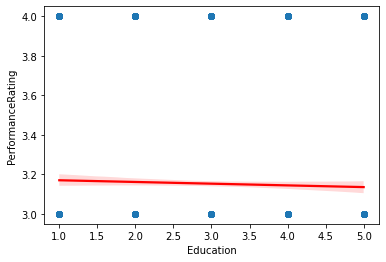

SpearmanrResult(correlation=-0.02508066939246116, pvalue=0.17397118324828875)
************************************************************
74 Regplot Education-RelationshipSatisfaction


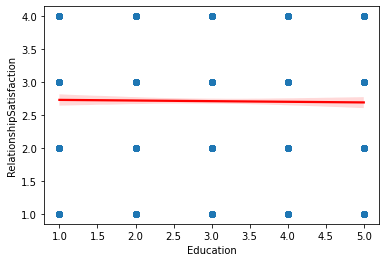

SpearmanrResult(correlation=-0.013172612473768717, pvalue=0.47524600090809654)
************************************************************
75 Regplot Education-StockOptionLevel


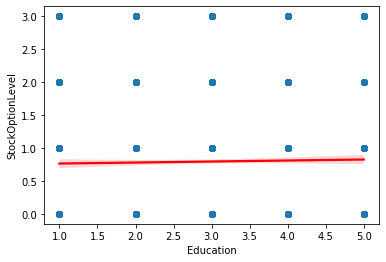

SpearmanrResult(correlation=0.013793504009850155, pvalue=0.45468597547850687)
************************************************************
76 Regplot Education-TotalWorkingYears


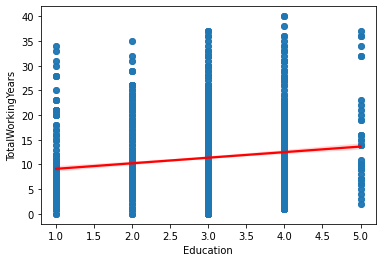

SpearmanrResult(correlation=0.1621767933147504, pvalue=8.877627565672107e-19)
************************************************************
77 Regplot Education-TrainingTimesLastYear


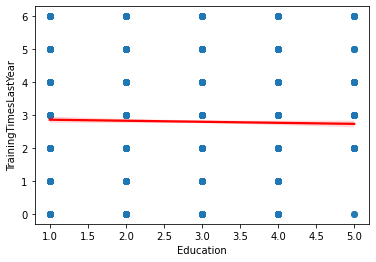

SpearmanrResult(correlation=-0.023748617030788007, pvalue=0.19798071025146818)
************************************************************
78 Regplot Education-WorkLifeBalance


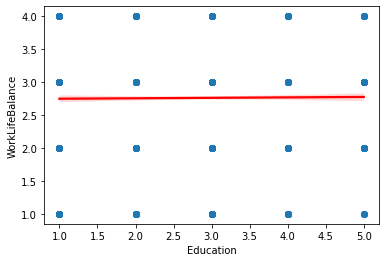

SpearmanrResult(correlation=0.017350435054979265, pvalue=0.3469909058501387)
************************************************************
79 Regplot Education-YearsAtCompany


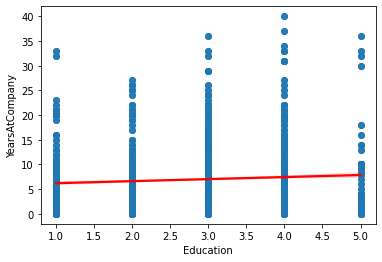

SpearmanrResult(correlation=0.06419612923203707, pvalue=0.0004959391931211807)
************************************************************
80 Regplot Education-YearsInCurrentRole


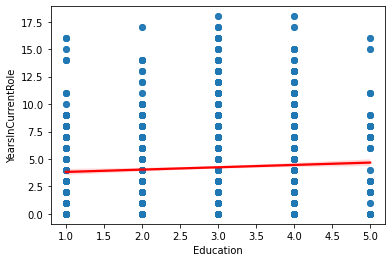

SpearmanrResult(correlation=0.05456721092891851, pvalue=0.0030796121094043903)
************************************************************
81 Regplot Education-YearsSinceLastPromotion


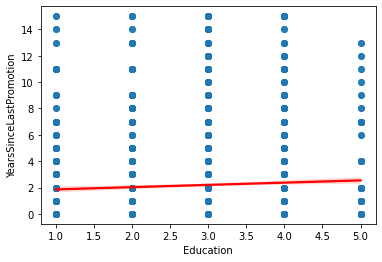

SpearmanrResult(correlation=0.032203024480317644, pvalue=0.08084308347347924)
************************************************************
82 Regplot Education-YearsWithCurrManager


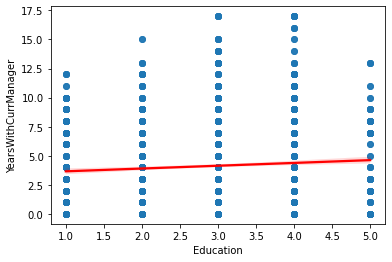

SpearmanrResult(correlation=0.05129186624592803, pvalue=0.005406100714906024)
************************************************************
83 Regplot EnvironmentSatisfaction-HourlyRate


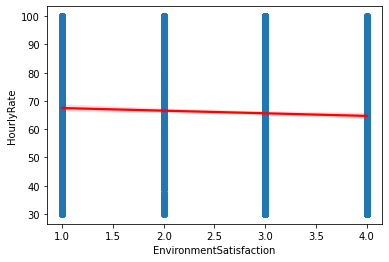

SpearmanrResult(correlation=-0.052380363461633404, pvalue=0.004498665185749437)
************************************************************
84 Regplot EnvironmentSatisfaction-JobInvolvement


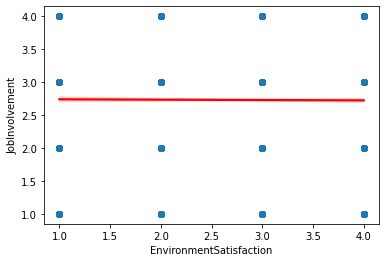

SpearmanrResult(correlation=-0.015301118806672672, pvalue=0.4069067075488896)
************************************************************
85 Regplot EnvironmentSatisfaction-JobLevel


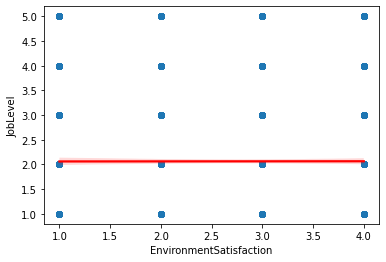

SpearmanrResult(correlation=-0.00019243168604686338, pvalue=0.9916785747183845)
************************************************************
86 Regplot EnvironmentSatisfaction-JobSatisfaction


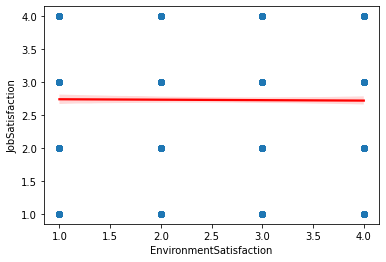

SpearmanrResult(correlation=-0.0029927822722807585, pvalue=0.871144187623942)
************************************************************
87 Regplot EnvironmentSatisfaction-MonthlyIncome


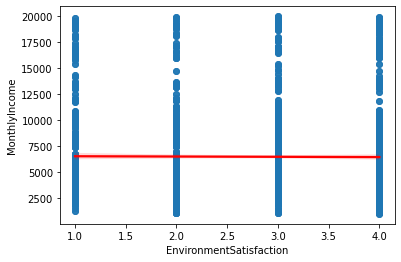

SpearmanrResult(correlation=-0.015163077434038212, pvalue=0.41115290112456315)
************************************************************
88 Regplot EnvironmentSatisfaction-MonthlyRate


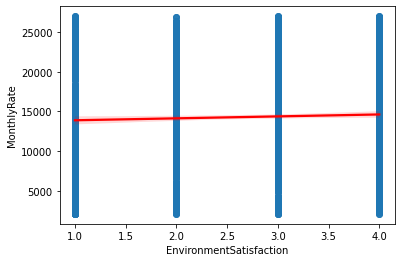

SpearmanrResult(correlation=0.03747650942841222, pvalue=0.04216457249066054)
************************************************************
89 Regplot EnvironmentSatisfaction-NumCompaniesWorked


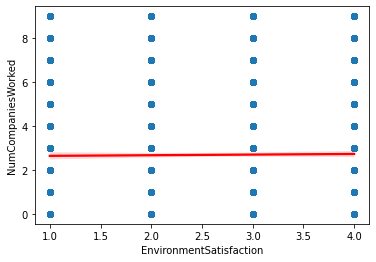

SpearmanrResult(correlation=0.006151418148874666, pvalue=0.7388307967093195)
************************************************************
90 Regplot EnvironmentSatisfaction-PercentSalaryHike


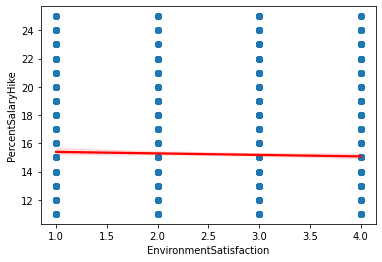

SpearmanrResult(correlation=-0.03048942614514931, pvalue=0.09835696241840985)
************************************************************
91 Regplot EnvironmentSatisfaction-PerformanceRating


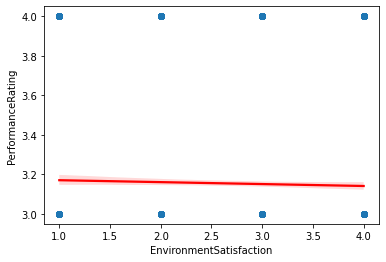

SpearmanrResult(correlation=-0.02915981685959382, pvalue=0.11393279885852872)
************************************************************
92 Regplot EnvironmentSatisfaction-RelationshipSatisfaction


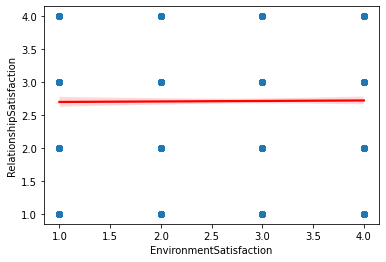

SpearmanrResult(correlation=0.00535345814527739, pvalue=0.7716994979495687)
************************************************************
93 Regplot EnvironmentSatisfaction-StockOptionLevel


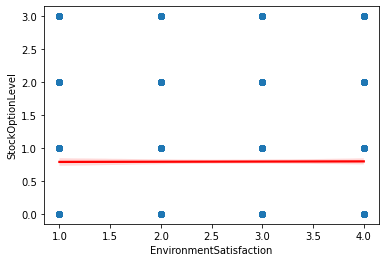

SpearmanrResult(correlation=0.00982616968176533, pvalue=0.594325342552996)
************************************************************
94 Regplot EnvironmentSatisfaction-TotalWorkingYears


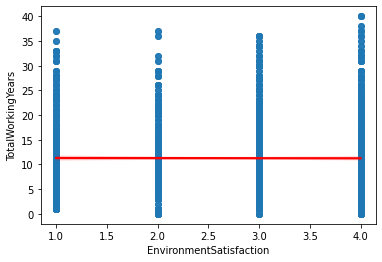

SpearmanrResult(correlation=-0.013881976000972665, pvalue=0.4517976641340412)
************************************************************
95 Regplot EnvironmentSatisfaction-TrainingTimesLastYear


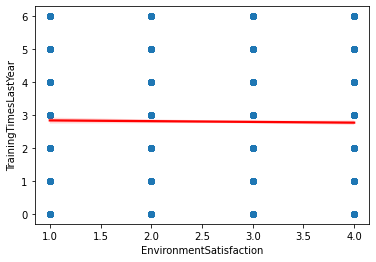

SpearmanrResult(correlation=-0.011658937697201636, pvalue=0.5274386011274335)
************************************************************
96 Regplot EnvironmentSatisfaction-WorkLifeBalance


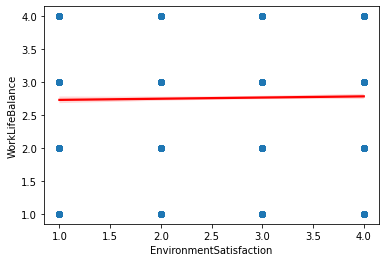

SpearmanrResult(correlation=0.02716897161742007, pvalue=0.1408063112320118)
************************************************************
97 Regplot EnvironmentSatisfaction-YearsAtCompany


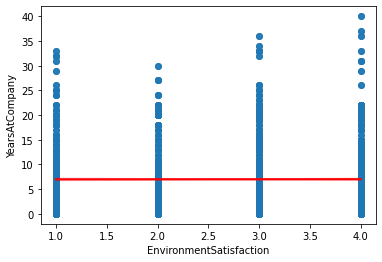

SpearmanrResult(correlation=0.008424504271928212, pvalue=0.6479547285367864)
************************************************************
98 Regplot EnvironmentSatisfaction-YearsInCurrentRole


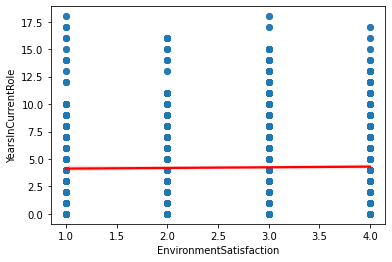

SpearmanrResult(correlation=0.020140165818025985, pvalue=0.27497302994730266)
************************************************************
99 Regplot EnvironmentSatisfaction-YearsSinceLastPromotion


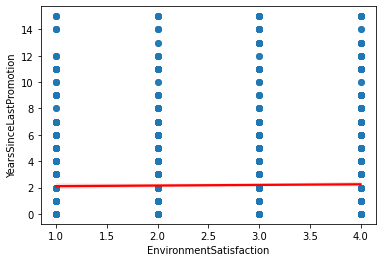

SpearmanrResult(correlation=0.02608167444694365, pvalue=0.15741077265090153)
************************************************************
100 Regplot EnvironmentSatisfaction-YearsWithCurrManager


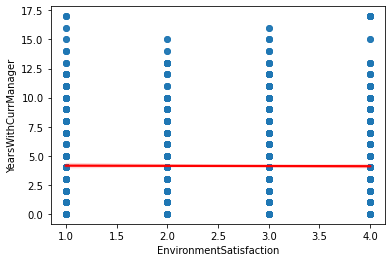

SpearmanrResult(correlation=-0.00173182420503788, pvalue=0.925218219085109)
************************************************************
101 Regplot HourlyRate-JobInvolvement


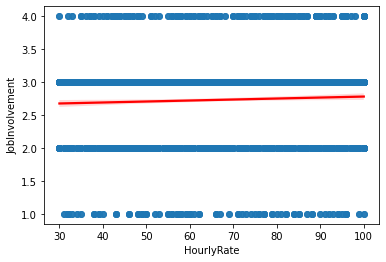

SpearmanrResult(correlation=0.04388431316126556, pvalue=0.017330523876155874)
************************************************************
102 Regplot HourlyRate-JobLevel


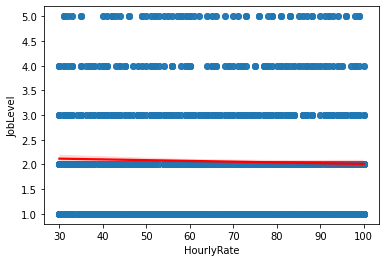

SpearmanrResult(correlation=-0.03387611132032741, pvalue=0.06627360724869032)
************************************************************
103 Regplot HourlyRate-JobSatisfaction


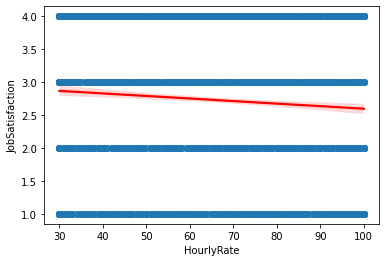

SpearmanrResult(correlation=-0.06834017259535337, pvalue=0.00020866778428645362)
************************************************************
104 Regplot HourlyRate-MonthlyIncome


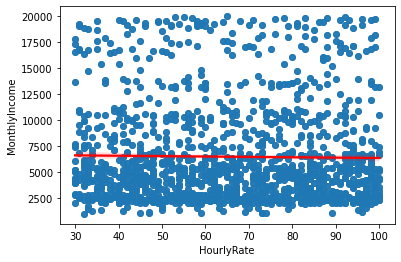

SpearmanrResult(correlation=-0.019761721893346577, pvalue=0.28409551304373915)
************************************************************
105 Regplot HourlyRate-MonthlyRate


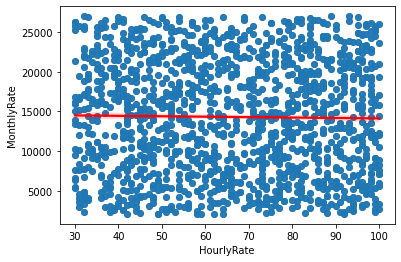

SpearmanrResult(correlation=-0.01488849975334271, pvalue=0.41967674523835063)
************************************************************
106 Regplot HourlyRate-NumCompaniesWorked


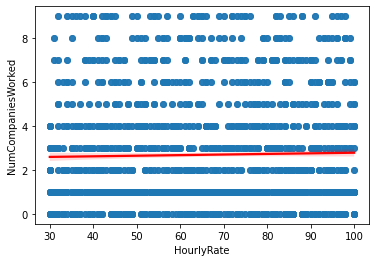

SpearmanrResult(correlation=0.019209250371218078, pvalue=0.2977768743028638)
************************************************************
107 Regplot HourlyRate-PercentSalaryHike


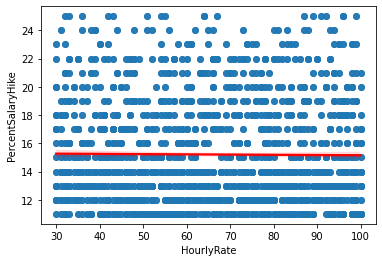

SpearmanrResult(correlation=-0.009875548312616741, pvalue=0.5924735257497131)
************************************************************
108 Regplot HourlyRate-PerformanceRating


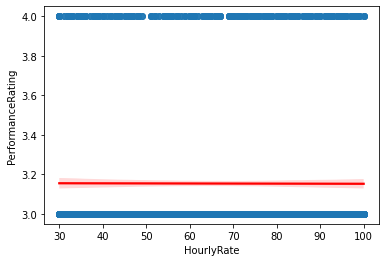

SpearmanrResult(correlation=-0.0021846441869309992, pvalue=0.9057467360636069)
************************************************************
109 Regplot HourlyRate-RelationshipSatisfaction


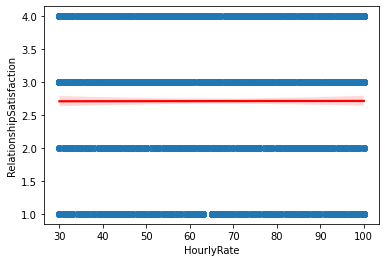

SpearmanrResult(correlation=0.0002585028152691532, pvalue=0.9888215888652153)
************************************************************
110 Regplot HourlyRate-StockOptionLevel


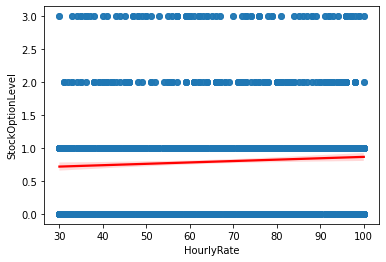

SpearmanrResult(correlation=0.05054307799880207, pvalue=0.0061229852793851635)
************************************************************
111 Regplot HourlyRate-TotalWorkingYears


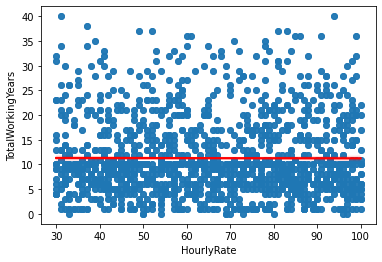

SpearmanrResult(correlation=-0.012071632754873675, pvalue=0.5129245058357816)
************************************************************
112 Regplot HourlyRate-TrainingTimesLastYear


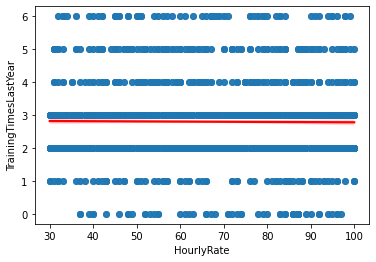

SpearmanrResult(correlation=0.0002918715012365139, pvalue=0.9873787435688544)
************************************************************
113 Regplot HourlyRate-WorkLifeBalance


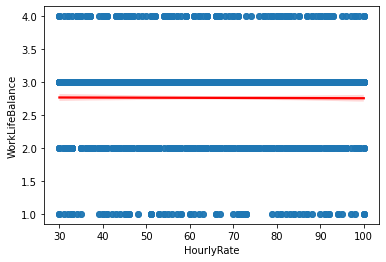

SpearmanrResult(correlation=-0.010003125737300443, pvalue=0.5877013564934225)
************************************************************
114 Regplot HourlyRate-YearsAtCompany


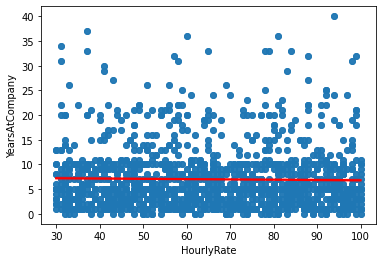

SpearmanrResult(correlation=-0.029032327714145, pvalue=0.11552296222310568)
************************************************************
115 Regplot HourlyRate-YearsInCurrentRole


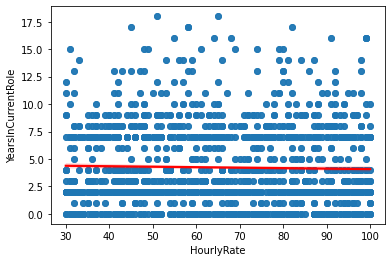

SpearmanrResult(correlation=-0.034016047545751514, pvalue=0.06515989606578516)
************************************************************
116 Regplot HourlyRate-YearsSinceLastPromotion


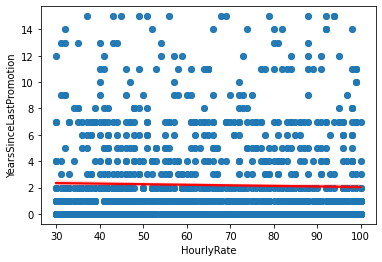

SpearmanrResult(correlation=-0.05241240222245271, pvalue=0.004474180411428228)
************************************************************
117 Regplot HourlyRate-YearsWithCurrManager


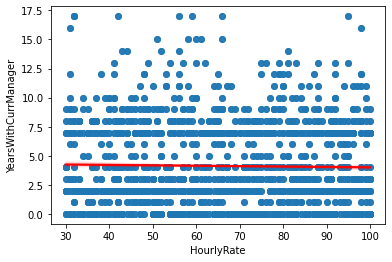

SpearmanrResult(correlation=-0.013811415507819945, pvalue=0.45410038755807614)
************************************************************
118 Regplot JobInvolvement-JobLevel


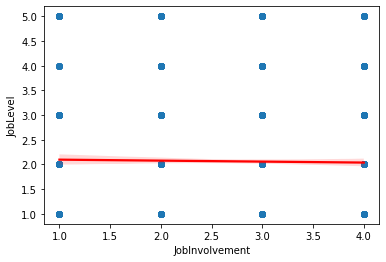

SpearmanrResult(correlation=-0.018423513048661837, pvalue=0.31798105174387753)
************************************************************
119 Regplot JobInvolvement-JobSatisfaction


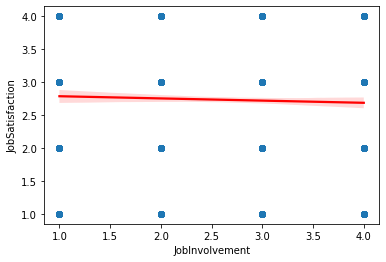

SpearmanrResult(correlation=-0.012148211843354711, pvalue=0.51025435281498)
************************************************************
120 Regplot JobInvolvement-MonthlyIncome


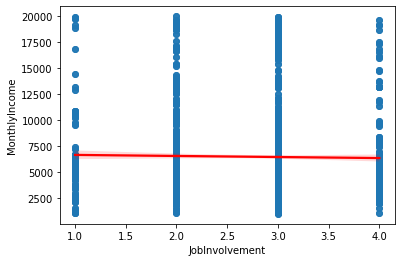

SpearmanrResult(correlation=-0.02455235242334959, pvalue=0.18321980602520765)
************************************************************
121 Regplot JobInvolvement-MonthlyRate


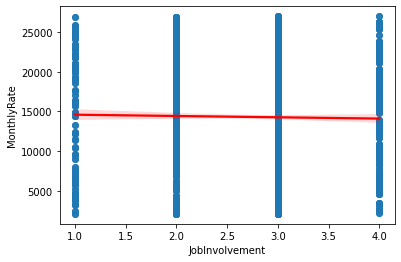

SpearmanrResult(correlation=-0.018117451571128398, pvalue=0.3260884787401799)
************************************************************
122 Regplot JobInvolvement-NumCompaniesWorked


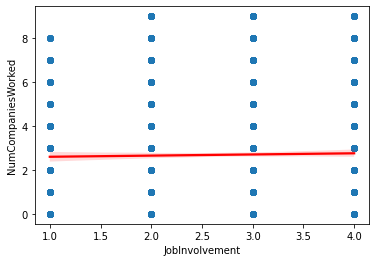

SpearmanrResult(correlation=0.01544815884569218, pvalue=0.4024125941105543)
************************************************************
123 Regplot JobInvolvement-PercentSalaryHike


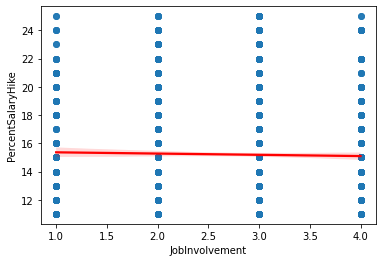

SpearmanrResult(correlation=-0.016998736601856794, pvalue=0.35685407977380335)
************************************************************
124 Regplot JobInvolvement-PerformanceRating


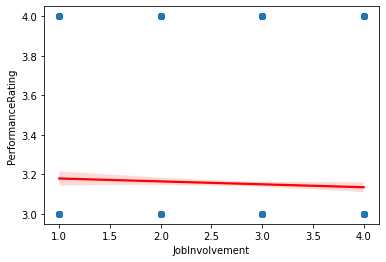

SpearmanrResult(correlation=-0.024732711659198204, pvalue=0.18002238686258107)
************************************************************
125 Regplot JobInvolvement-RelationshipSatisfaction


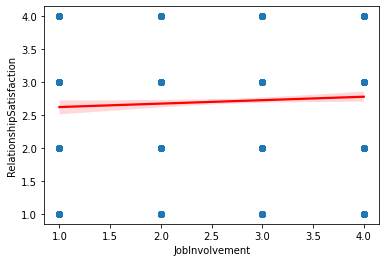

SpearmanrResult(correlation=0.03785729689995369, pvalue=0.0401160121325708)
************************************************************
126 Regplot JobInvolvement-StockOptionLevel


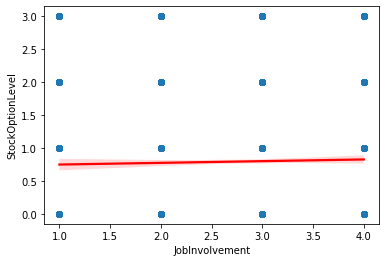

SpearmanrResult(correlation=0.034464289821546826, pvalue=0.061695883817084345)
************************************************************
127 Regplot JobInvolvement-TotalWorkingYears


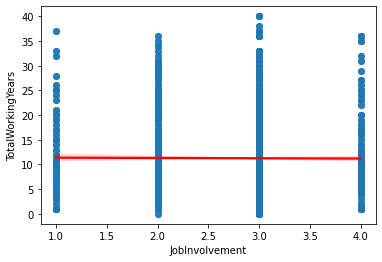

SpearmanrResult(correlation=0.0064441040693092545, pvalue=0.7268898115366755)
************************************************************
128 Regplot JobInvolvement-TrainingTimesLastYear


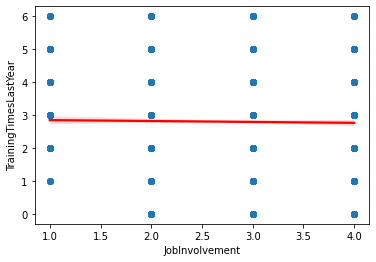

SpearmanrResult(correlation=0.00201391500312109, pvalue=0.9130821662806448)
************************************************************
129 Regplot JobInvolvement-WorkLifeBalance


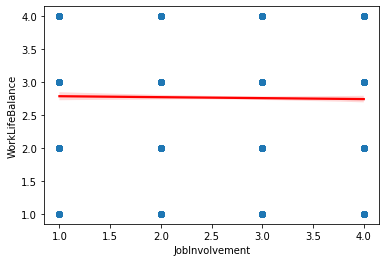

SpearmanrResult(correlation=-0.01988863432386915, pvalue=0.2810137084229472)
************************************************************
130 Regplot JobInvolvement-YearsAtCompany


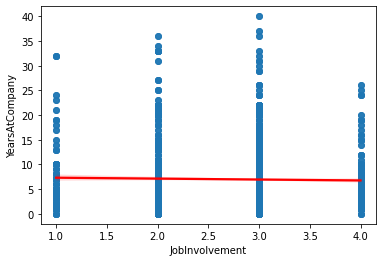

SpearmanrResult(correlation=0.013836362338992164, pvalue=0.45328549926641026)
************************************************************
131 Regplot JobInvolvement-YearsInCurrentRole


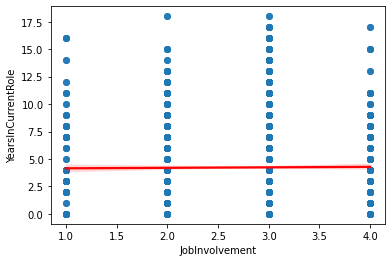

SpearmanrResult(correlation=0.015547840471072221, pvalue=0.3993829258421928)
************************************************************
132 Regplot JobInvolvement-YearsSinceLastPromotion


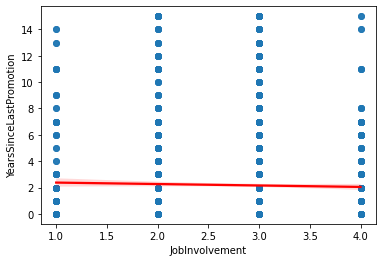

SpearmanrResult(correlation=-0.008306724699700384, pvalue=0.6525507203113239)
************************************************************
133 Regplot JobInvolvement-YearsWithCurrManager


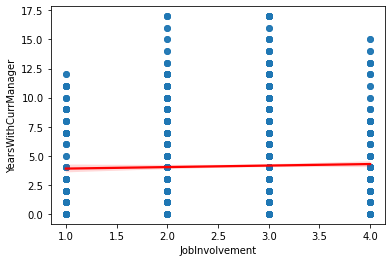

SpearmanrResult(correlation=0.03739701447374156, pvalue=0.04260322179672565)
************************************************************
134 Regplot JobLevel-JobSatisfaction


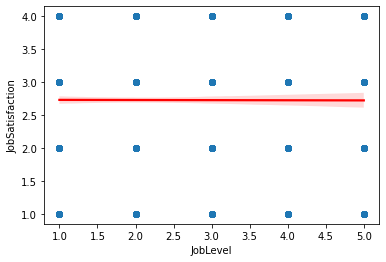

SpearmanrResult(correlation=-0.0008519729910609089, pvalue=0.9631700952437976)
************************************************************
135 Regplot JobLevel-MonthlyIncome


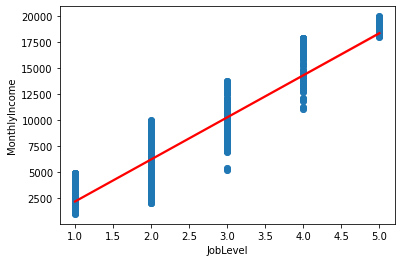

SpearmanrResult(correlation=0.9204286748392108, pvalue=0.0)
************************************************************
136 Regplot JobLevel-MonthlyRate


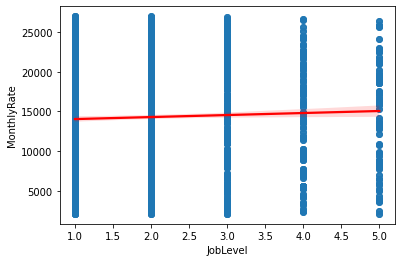

SpearmanrResult(correlation=0.0527918878356706, pvalue=0.00419321162928771)
************************************************************
137 Regplot JobLevel-NumCompaniesWorked


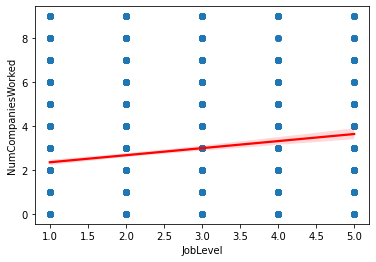

SpearmanrResult(correlation=0.17827015359880186, pvalue=2.0329394945697016e-22)
************************************************************
138 Regplot JobLevel-PercentSalaryHike


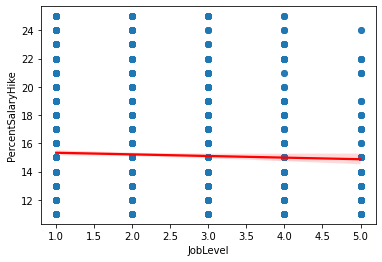

SpearmanrResult(correlation=-0.03245275225875634, pvalue=0.07851626968916613)
************************************************************
139 Regplot JobLevel-PerformanceRating


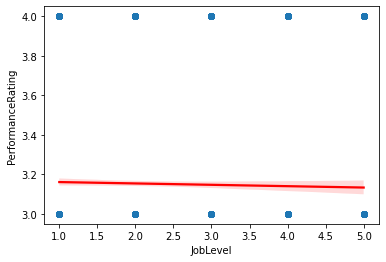

SpearmanrResult(correlation=-0.018608301437276042, pvalue=0.3131505607201813)
************************************************************
140 Regplot JobLevel-RelationshipSatisfaction


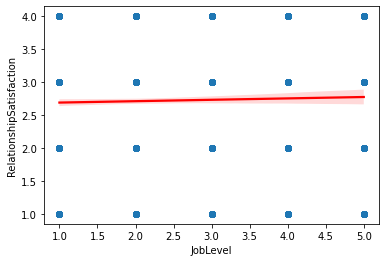

SpearmanrResult(correlation=0.011311233123622897, pvalue=0.5398275153503107)
************************************************************
141 Regplot JobLevel-StockOptionLevel


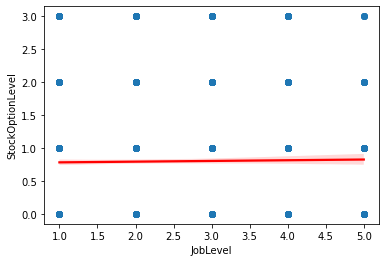

SpearmanrResult(correlation=0.04778616993274847, pvalue=0.00955782242284405)
************************************************************
142 Regplot JobLevel-TotalWorkingYears


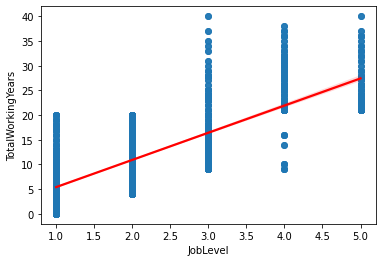

SpearmanrResult(correlation=0.734677590631887, pvalue=0.0)
************************************************************
143 Regplot JobLevel-TrainingTimesLastYear


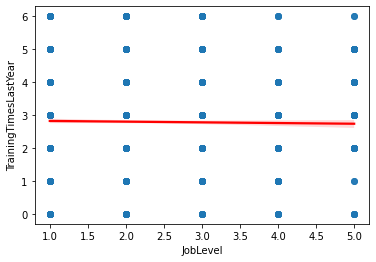

SpearmanrResult(correlation=-0.019728587905149263, pvalue=0.28490385316283634)
************************************************************
144 Regplot JobLevel-WorkLifeBalance


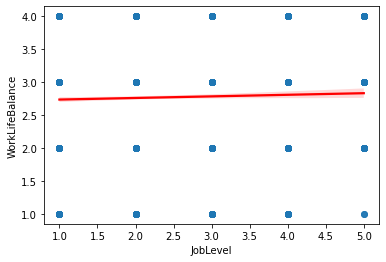

SpearmanrResult(correlation=0.04046578053521546, pvalue=0.02822881726783319)
************************************************************
145 Regplot JobLevel-YearsAtCompany


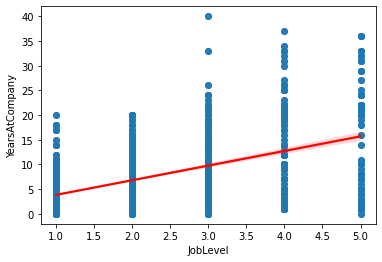

SpearmanrResult(correlation=0.4722827148585965, pvalue=3.01851203297873e-163)
************************************************************
146 Regplot JobLevel-YearsInCurrentRole


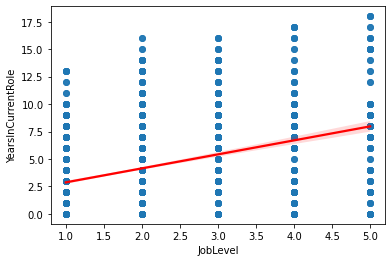

SpearmanrResult(correlation=0.39108540191924773, pvalue=4.7298174683569544e-108)
************************************************************
147 Regplot JobLevel-YearsSinceLastPromotion


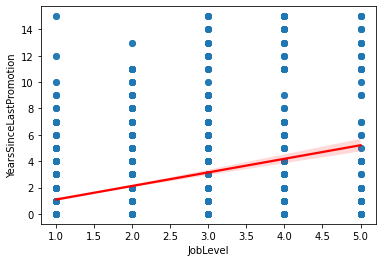

SpearmanrResult(correlation=0.2690960789349891, pvalue=6.029623561293248e-50)
************************************************************
148 Regplot JobLevel-YearsWithCurrManager


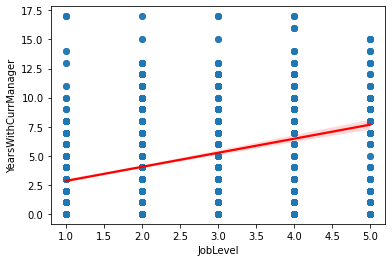

SpearmanrResult(correlation=0.3708892876663952, pvalue=1.5285968401630338e-96)
************************************************************
149 Regplot JobSatisfaction-MonthlyIncome


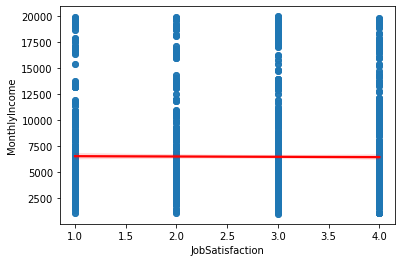

SpearmanrResult(correlation=0.004880777922211002, pvalue=0.7913689030608411)
************************************************************
150 Regplot JobSatisfaction-MonthlyRate


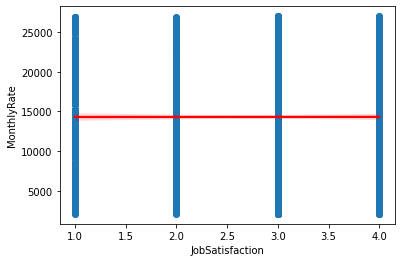

SpearmanrResult(correlation=-0.002701728793920637, pvalue=0.8835815674250264)
************************************************************
151 Regplot JobSatisfaction-NumCompaniesWorked


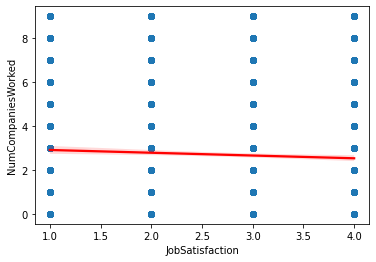

SpearmanrResult(correlation=-0.05151588893809878, pvalue=0.005206855075971512)
************************************************************
152 Regplot JobSatisfaction-PercentSalaryHike


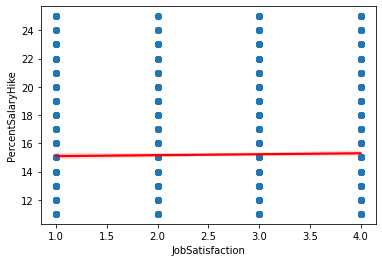

SpearmanrResult(correlation=0.023969545746785788, pvalue=0.19383924705379801)
************************************************************
153 Regplot JobSatisfaction-PerformanceRating


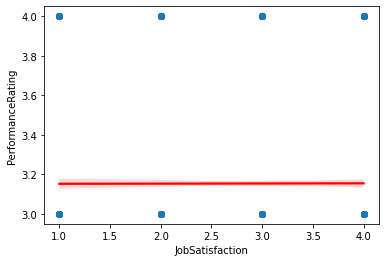

SpearmanrResult(correlation=0.006978501891054847, pvalue=0.7052594459620878)
************************************************************
154 Regplot JobSatisfaction-RelationshipSatisfaction


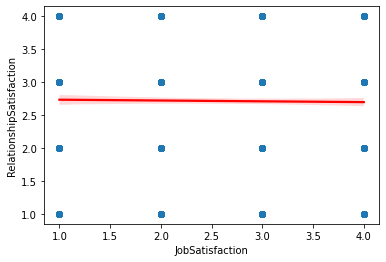

SpearmanrResult(correlation=-0.014678553829698009, pvalue=0.42626368019833094)
************************************************************
155 Regplot JobSatisfaction-StockOptionLevel


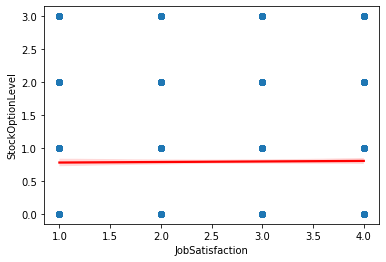

SpearmanrResult(correlation=0.012785495876862606, pvalue=0.48831853113696744)
************************************************************
156 Regplot JobSatisfaction-TotalWorkingYears


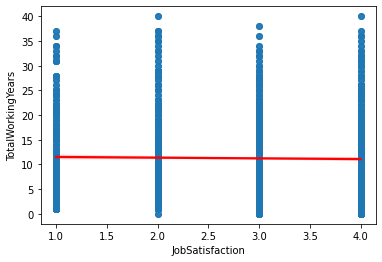

SpearmanrResult(correlation=-0.015874716751321474, pvalue=0.38954468936584286)
************************************************************
157 Regplot JobSatisfaction-TrainingTimesLastYear


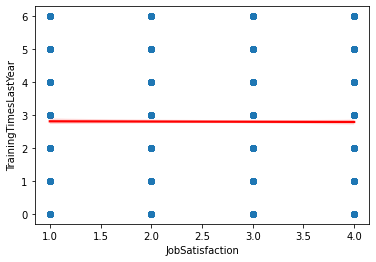

SpearmanrResult(correlation=-0.011680993270126437, pvalue=0.5266576650722188)
************************************************************
158 Regplot JobSatisfaction-WorkLifeBalance


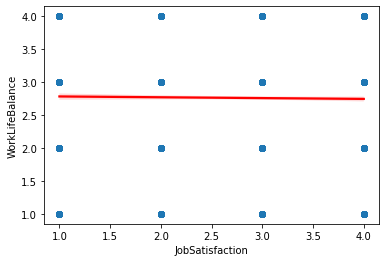

SpearmanrResult(correlation=-0.02978086277400973, pvalue=0.10643150631594465)
************************************************************
159 Regplot JobSatisfaction-YearsAtCompany


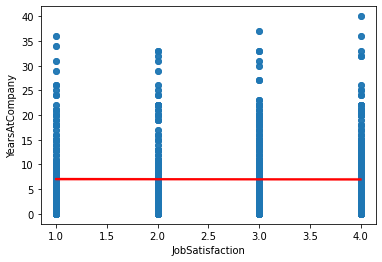

SpearmanrResult(correlation=0.012280405536957235, pvalue=0.5056621896510757)
************************************************************
160 Regplot JobSatisfaction-YearsInCurrentRole


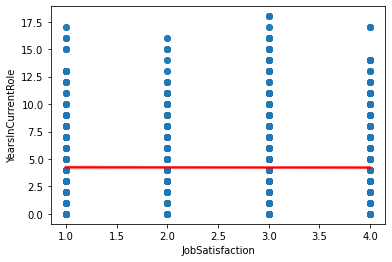

SpearmanrResult(correlation=0.0005310846240571082, pvalue=0.9770367796345008)
************************************************************
161 Regplot JobSatisfaction-YearsSinceLastPromotion


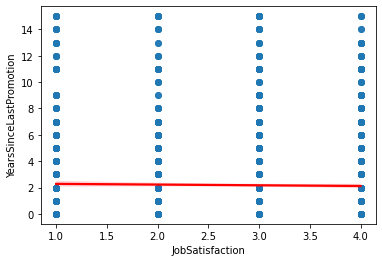

SpearmanrResult(correlation=0.007497130621585798, pvalue=0.6844924241366399)
************************************************************
162 Regplot JobSatisfaction-YearsWithCurrManager


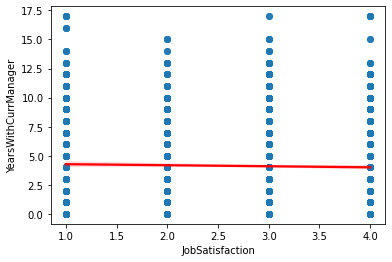

SpearmanrResult(correlation=-0.01677217932332992, pvalue=0.3633002958895457)
************************************************************
163 Regplot MonthlyIncome-MonthlyRate


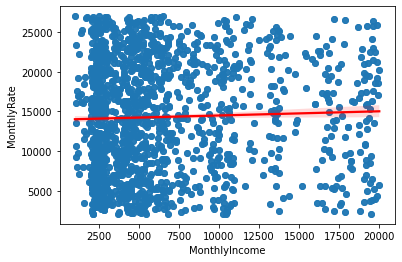

SpearmanrResult(correlation=0.05427676599185804, pvalue=0.003241039440395583)
************************************************************
164 Regplot MonthlyIncome-NumCompaniesWorked


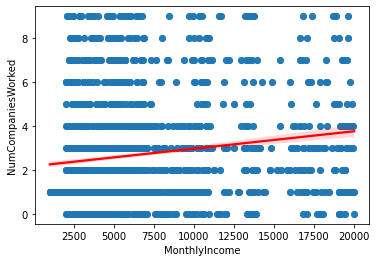

SpearmanrResult(correlation=0.1903072165077433, pvalue=2.2398528305530998e-25)
************************************************************
165 Regplot MonthlyIncome-PercentSalaryHike


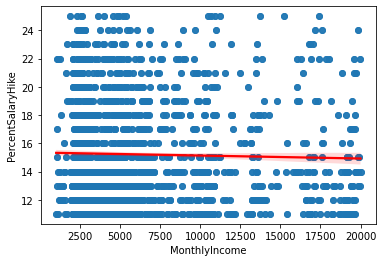

SpearmanrResult(correlation=-0.033767076407092166, pvalue=0.06715220802737629)
************************************************************
166 Regplot MonthlyIncome-PerformanceRating


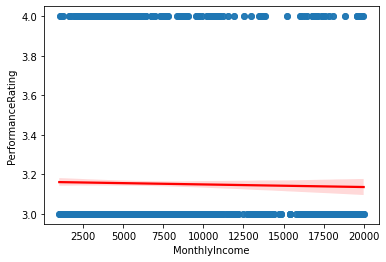

SpearmanrResult(correlation=-0.02699947515703544, pvalue=0.1433023186592473)
************************************************************
167 Regplot MonthlyIncome-RelationshipSatisfaction


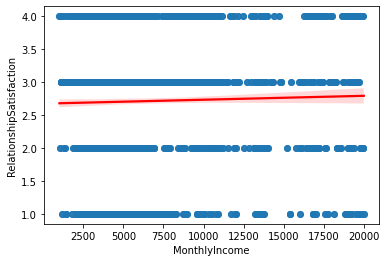

SpearmanrResult(correlation=0.003885241102559699, pvalue=0.8332182617251318)
************************************************************
168 Regplot MonthlyIncome-StockOptionLevel


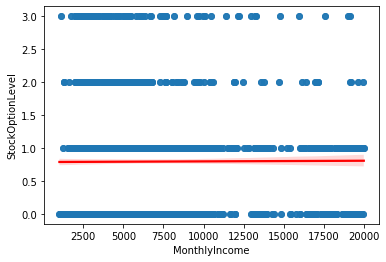

SpearmanrResult(correlation=0.045851880515603, pvalue=0.012903542489035403)
************************************************************
169 Regplot MonthlyIncome-TotalWorkingYears


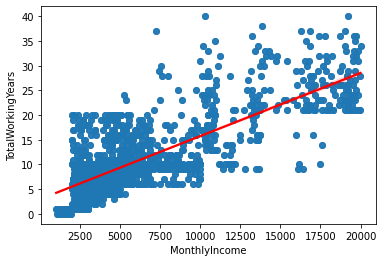

SpearmanrResult(correlation=0.7100243140565019, pvalue=0.0)
************************************************************
170 Regplot MonthlyIncome-TrainingTimesLastYear


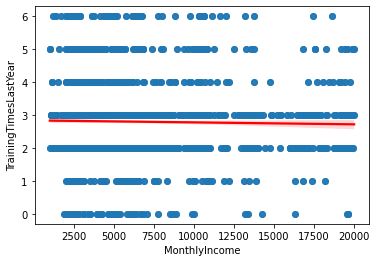

SpearmanrResult(correlation=-0.0348467617273593, pvalue=0.058861922919908286)
************************************************************
171 Regplot MonthlyIncome-WorkLifeBalance


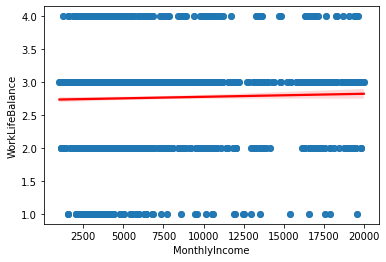

SpearmanrResult(correlation=0.0307591463106208, pvalue=0.09541491476262494)
************************************************************
172 Regplot MonthlyIncome-YearsAtCompany


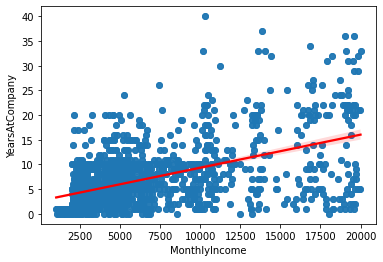

SpearmanrResult(correlation=0.464315235267433, pvalue=3.8501893127969745e-157)
************************************************************
173 Regplot MonthlyIncome-YearsInCurrentRole


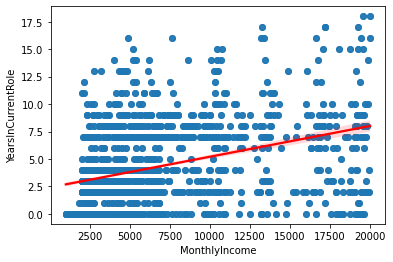

SpearmanrResult(correlation=0.3947118335315311, pvalue=3.318618057018454e-110)
************************************************************
174 Regplot MonthlyIncome-YearsSinceLastPromotion


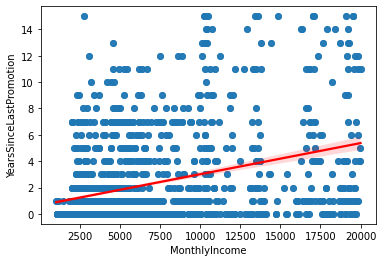

SpearmanrResult(correlation=0.26459933156915305, pvalue=2.729067337921672e-48)
************************************************************
175 Regplot MonthlyIncome-YearsWithCurrManager


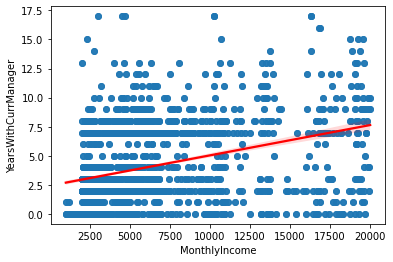

SpearmanrResult(correlation=0.36538567815872924, pvalue=1.517989298831766e-93)
************************************************************
176 Regplot MonthlyRate-NumCompaniesWorked


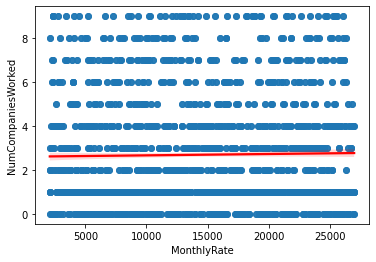

SpearmanrResult(correlation=0.019553298431607576, pvalue=0.28920608962541805)
************************************************************
177 Regplot MonthlyRate-PercentSalaryHike


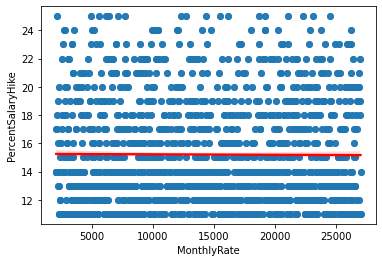

SpearmanrResult(correlation=-0.005470536871346097, pvalue=0.766849600459623)
************************************************************
178 Regplot MonthlyRate-PerformanceRating


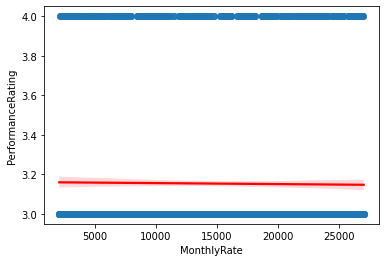

SpearmanrResult(correlation=-0.009697588341252499, pvalue=0.5991598150898105)
************************************************************
179 Regplot MonthlyRate-RelationshipSatisfaction


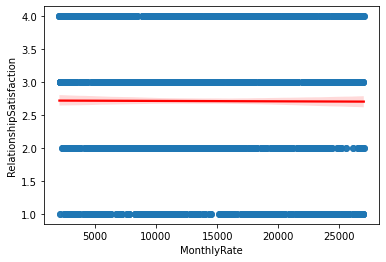

SpearmanrResult(correlation=-0.00037281483161375536, pvalue=0.9838789751686758)
************************************************************
180 Regplot MonthlyRate-StockOptionLevel


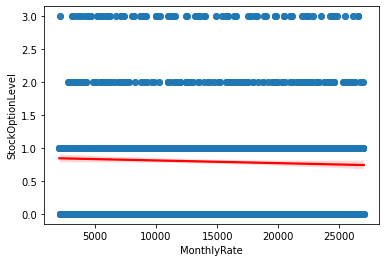

SpearmanrResult(correlation=-0.03727429363312767, pvalue=0.043287959540540544)
************************************************************
181 Regplot MonthlyRate-TotalWorkingYears


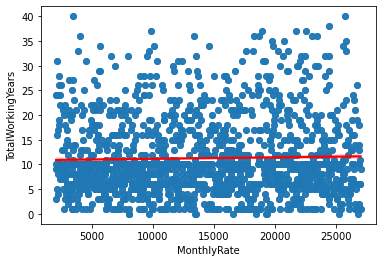

SpearmanrResult(correlation=0.013359823113769242, pvalue=0.46899361582996857)
************************************************************
182 Regplot MonthlyRate-TrainingTimesLastYear


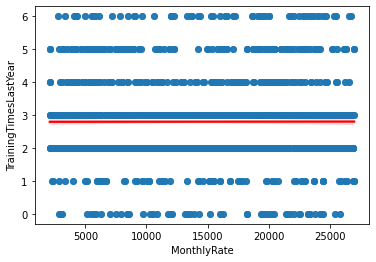

SpearmanrResult(correlation=-0.010017947191819141, pvalue=0.5871480984095045)
************************************************************
183 Regplot MonthlyRate-WorkLifeBalance


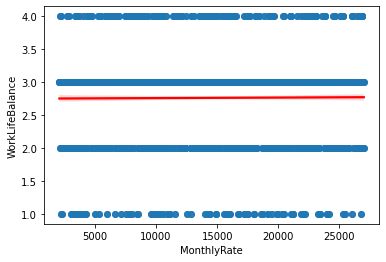

SpearmanrResult(correlation=0.006316263475298493, pvalue=0.7320974896919721)
************************************************************
184 Regplot MonthlyRate-YearsAtCompany


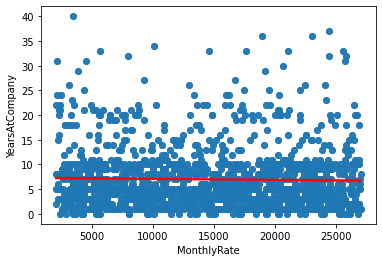

SpearmanrResult(correlation=-0.029861868063787118, pvalue=0.10548262101619223)
************************************************************
185 Regplot MonthlyRate-YearsInCurrentRole


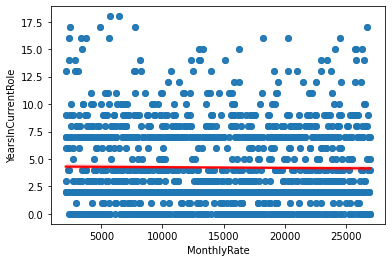

SpearmanrResult(correlation=-0.006865497271888684, pvalue=0.7098143217261388)
************************************************************
186 Regplot MonthlyRate-YearsSinceLastPromotion


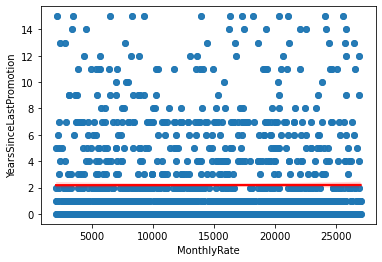

SpearmanrResult(correlation=-0.016285473404381207, pvalue=0.3773928884338066)
************************************************************
187 Regplot MonthlyRate-YearsWithCurrManager


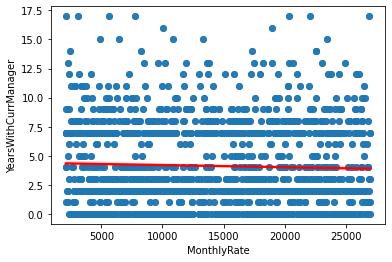

SpearmanrResult(correlation=-0.035059141800175796, pvalue=0.05733548447341179)
************************************************************
188 Regplot NumCompaniesWorked-PercentSalaryHike


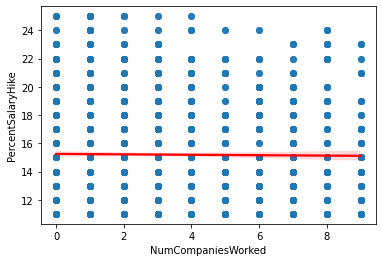

SpearmanrResult(correlation=4.628802332206085e-05, pvalue=0.9979983083291115)
************************************************************
189 Regplot NumCompaniesWorked-PerformanceRating


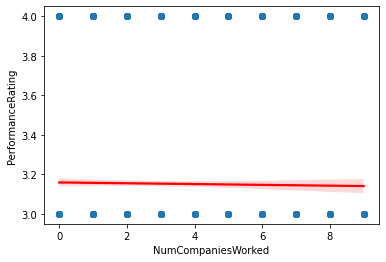

SpearmanrResult(correlation=-0.008298387395543835, pvalue=0.6528765612497115)
************************************************************
190 Regplot NumCompaniesWorked-RelationshipSatisfaction


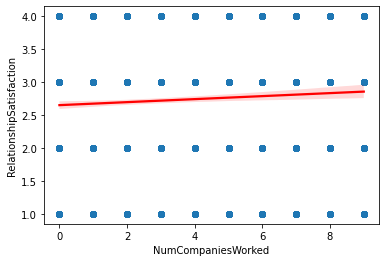

SpearmanrResult(correlation=0.040296365120478156, pvalue=0.02889629943523729)
************************************************************
191 Regplot NumCompaniesWorked-StockOptionLevel


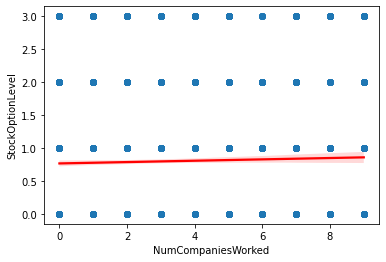

SpearmanrResult(correlation=0.032276911488446795, pvalue=0.08014889148913501)
************************************************************
192 Regplot NumCompaniesWorked-TotalWorkingYears


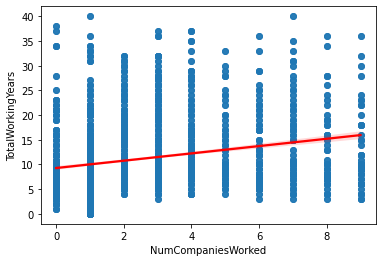

SpearmanrResult(correlation=0.3151955817929021, pvalue=8.166701759311491e-69)
************************************************************
193 Regplot NumCompaniesWorked-TrainingTimesLastYear


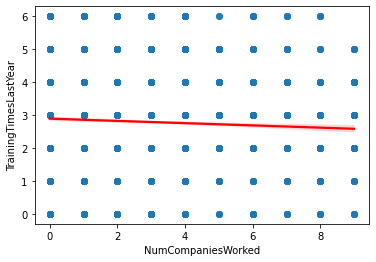

SpearmanrResult(correlation=-0.04733649411650567, pvalue=0.010257792317261543)
************************************************************
194 Regplot NumCompaniesWorked-WorkLifeBalance


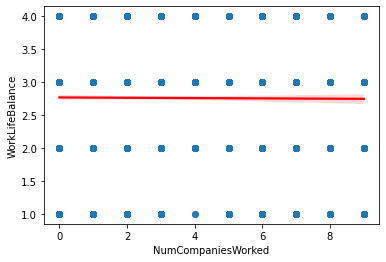

SpearmanrResult(correlation=0.009102503597596123, pvalue=0.6217623644831094)
************************************************************
195 Regplot NumCompaniesWorked-YearsAtCompany


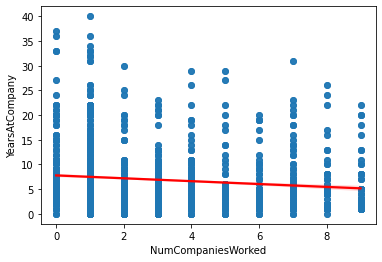

SpearmanrResult(correlation=-0.17106983096725337, pvalue=9.570186381845013e-21)
************************************************************
196 Regplot NumCompaniesWorked-YearsInCurrentRole


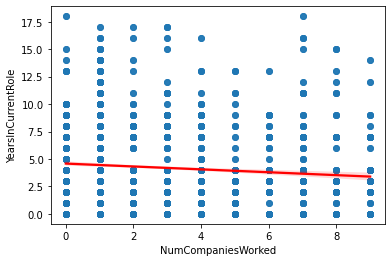

SpearmanrResult(correlation=-0.12767297617411805, pvalue=3.7007719252785116e-12)
************************************************************
197 Regplot NumCompaniesWorked-YearsSinceLastPromotion


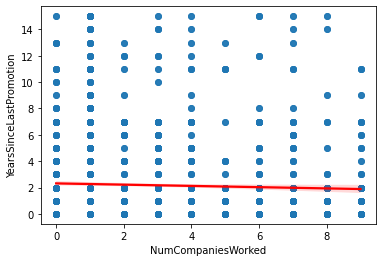

SpearmanrResult(correlation=-0.06695017895522498, pvalue=0.00028048252442536894)
************************************************************
198 Regplot NumCompaniesWorked-YearsWithCurrManager


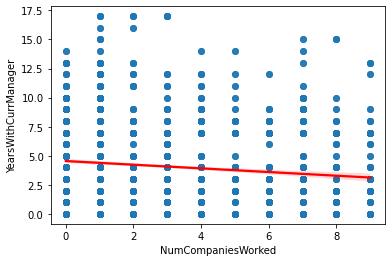

SpearmanrResult(correlation=-0.14412897573695665, pvalue=4.073812684781122e-15)
************************************************************
199 Regplot PercentSalaryHike-PerformanceRating


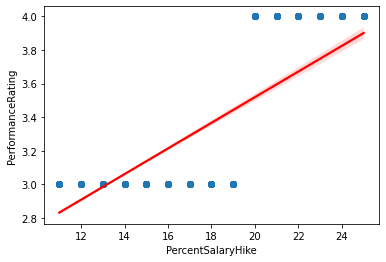

SpearmanrResult(correlation=0.6285191214366401, pvalue=6e-323)
************************************************************
200 Regplot PercentSalaryHike-RelationshipSatisfaction


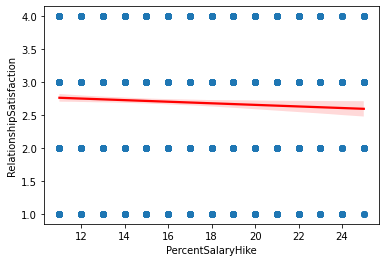

SpearmanrResult(correlation=-0.03491457267409509, pvalue=0.05837092241326126)
************************************************************
201 Regplot PercentSalaryHike-StockOptionLevel


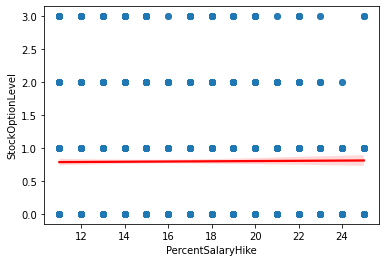

SpearmanrResult(correlation=0.02344587564437186, pvalue=0.20376035573627294)
************************************************************
202 Regplot PercentSalaryHike-TotalWorkingYears


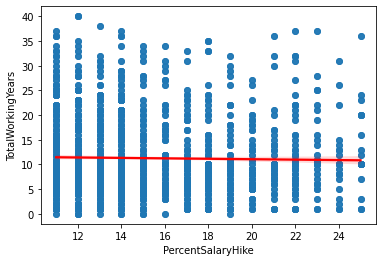

SpearmanrResult(correlation=-0.02552760406262122, pvalue=0.16642317350093055)
************************************************************
203 Regplot PercentSalaryHike-TrainingTimesLastYear


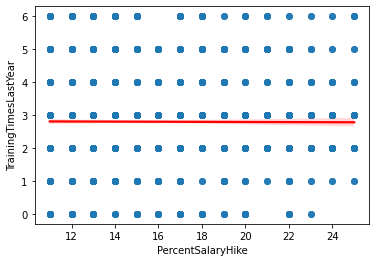

SpearmanrResult(correlation=-0.004106181723038015, pvalue=0.8238852207801378)
************************************************************
204 Regplot PercentSalaryHike-WorkLifeBalance


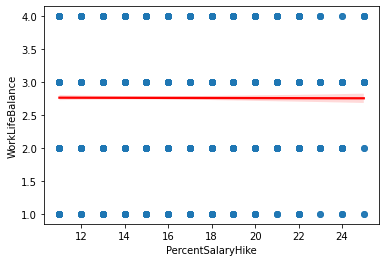

SpearmanrResult(correlation=0.0009304377038703606, pvalue=0.9597808991466596)
************************************************************
205 Regplot PercentSalaryHike-YearsAtCompany


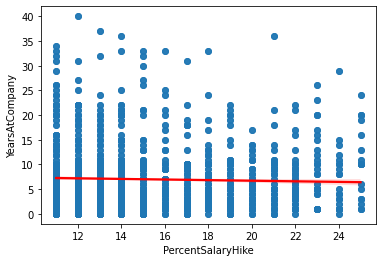

SpearmanrResult(correlation=-0.054116760663330064, pvalue=0.003333225714160845)
************************************************************
206 Regplot PercentSalaryHike-YearsInCurrentRole


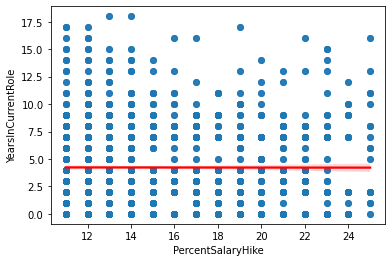

SpearmanrResult(correlation=-0.02552848046478877, pvalue=0.16640861818829197)
************************************************************
207 Regplot PercentSalaryHike-YearsSinceLastPromotion


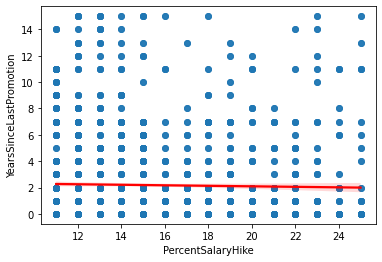

SpearmanrResult(correlation=-0.05536241929008845, pvalue=0.002674424996568049)
************************************************************
208 Regplot PercentSalaryHike-YearsWithCurrManager


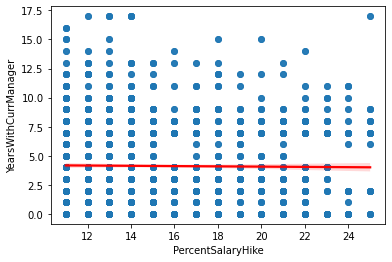

SpearmanrResult(correlation=-0.026048832231173737, pvalue=0.15793445549180873)
************************************************************
209 Regplot PerformanceRating-RelationshipSatisfaction


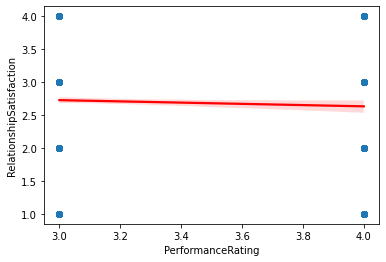

SpearmanrResult(correlation=-0.032988778872362866, pvalue=0.07370569886115455)
************************************************************
210 Regplot PerformanceRating-StockOptionLevel


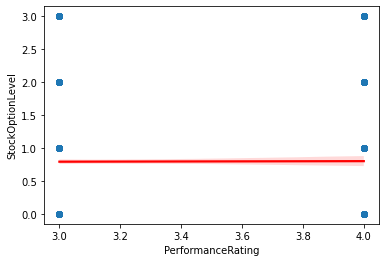

SpearmanrResult(correlation=0.011028055378024097, pvalue=0.5500237500793256)
************************************************************
211 Regplot PerformanceRating-TotalWorkingYears


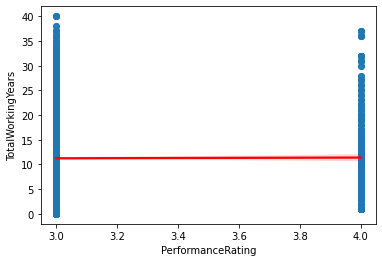

SpearmanrResult(correlation=0.011678101476226638, pvalue=0.5267600230799638)
************************************************************
212 Regplot PerformanceRating-TrainingTimesLastYear


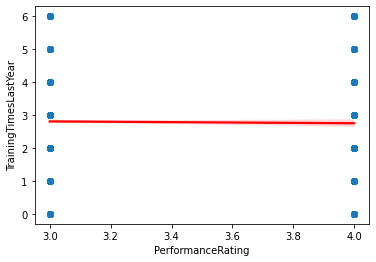

SpearmanrResult(correlation=-0.01667579207770579, pvalue=0.3660647392414804)
************************************************************
213 Regplot PerformanceRating-WorkLifeBalance


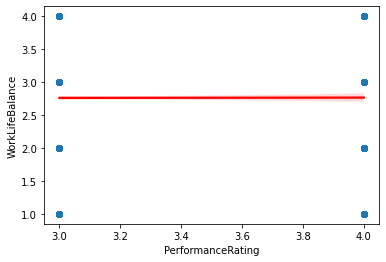

SpearmanrResult(correlation=0.006808391339126777, pvalue=0.7121200500679798)
************************************************************
214 Regplot PerformanceRating-YearsAtCompany


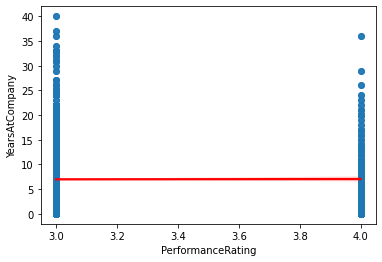

SpearmanrResult(correlation=0.01722425211316946, pvalue=0.35050950281113313)
************************************************************
215 Regplot PerformanceRating-YearsInCurrentRole


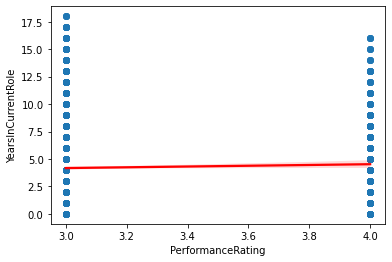

SpearmanrResult(correlation=0.032719266637528006, pvalue=0.07609344033234935)
************************************************************
216 Regplot PerformanceRating-YearsSinceLastPromotion


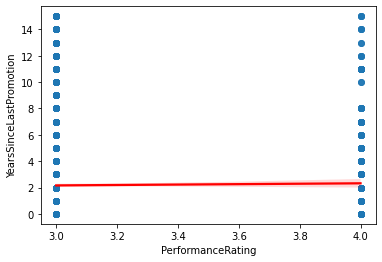

SpearmanrResult(correlation=-0.006578150349915516, pvalue=0.7214428562185642)
************************************************************
217 Regplot PerformanceRating-YearsWithCurrManager


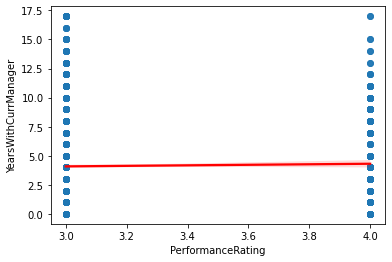

SpearmanrResult(correlation=0.025560015069465876, pvalue=0.1658855268540802)
************************************************************
218 Regplot RelationshipSatisfaction-StockOptionLevel


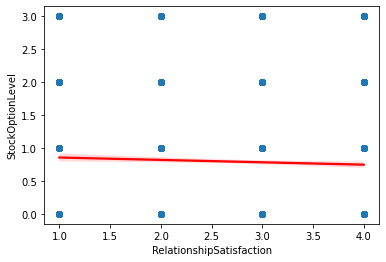

SpearmanrResult(correlation=-0.056249005170487004, pvalue=0.002280508834389969)
************************************************************
219 Regplot RelationshipSatisfaction-TotalWorkingYears


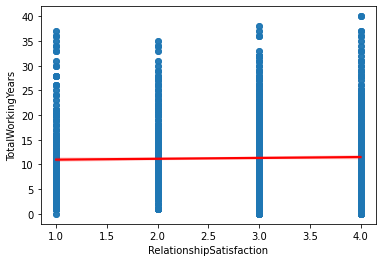

SpearmanrResult(correlation=0.003971274386427152, pvalue=0.8295811472379229)
************************************************************
220 Regplot RelationshipSatisfaction-TrainingTimesLastYear


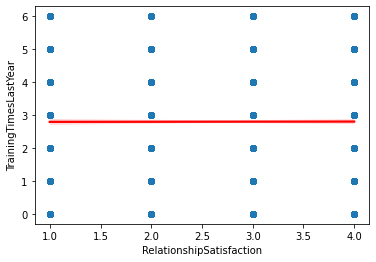

SpearmanrResult(correlation=0.005424103758106907, pvalue=0.7687719766451616)
************************************************************
221 Regplot RelationshipSatisfaction-WorkLifeBalance


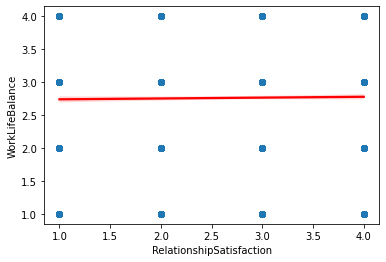

SpearmanrResult(correlation=0.01768411712636692, pvalue=0.3377949339927315)
************************************************************
222 Regplot RelationshipSatisfaction-YearsAtCompany


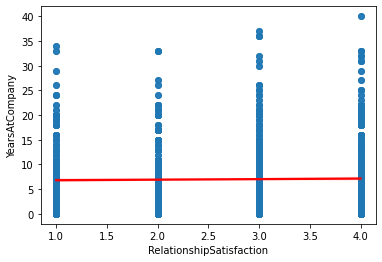

SpearmanrResult(correlation=-0.0012671613024981805, pvalue=0.9452455051675732)
************************************************************
223 Regplot RelationshipSatisfaction-YearsInCurrentRole


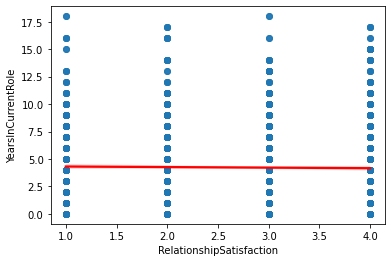

SpearmanrResult(correlation=-0.021399768792590906, pvalue=0.24605993655983266)
************************************************************
224 Regplot RelationshipSatisfaction-YearsSinceLastPromotion


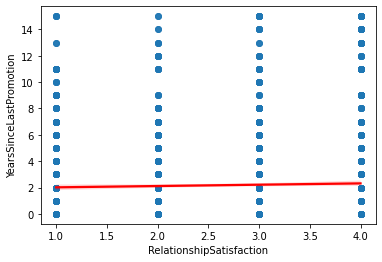

SpearmanrResult(correlation=0.03696299987028467, pvalue=0.045066668031356116)
************************************************************
225 Regplot RelationshipSatisfaction-YearsWithCurrManager


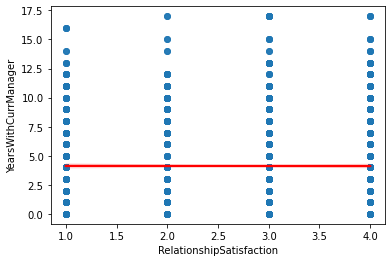

SpearmanrResult(correlation=0.00028004763837101144, pvalue=0.987889997011083)
************************************************************
226 Regplot StockOptionLevel-TotalWorkingYears


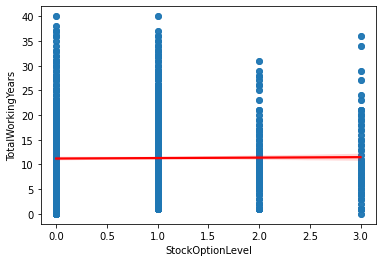

SpearmanrResult(correlation=0.05261828080374275, pvalue=0.004319701702719897)
************************************************************
227 Regplot StockOptionLevel-TrainingTimesLastYear


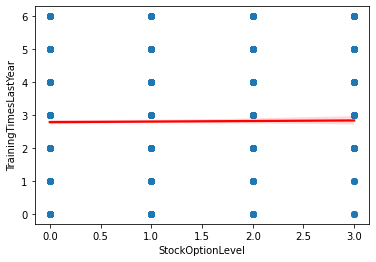

SpearmanrResult(correlation=0.0033884630610447855, pvalue=0.854287368884056)
************************************************************
228 Regplot StockOptionLevel-WorkLifeBalance


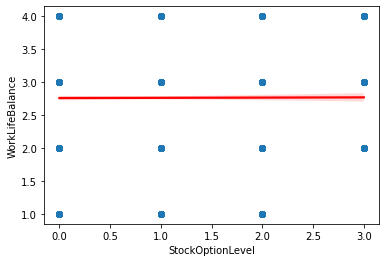

SpearmanrResult(correlation=-0.016567956327631576, pvalue=0.3691730347385045)
************************************************************
229 Regplot StockOptionLevel-YearsAtCompany


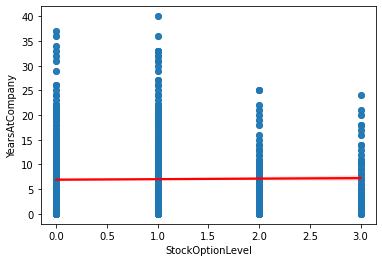

SpearmanrResult(correlation=0.064974118988158, pvalue=0.0004231014776054965)
************************************************************
230 Regplot StockOptionLevel-YearsInCurrentRole


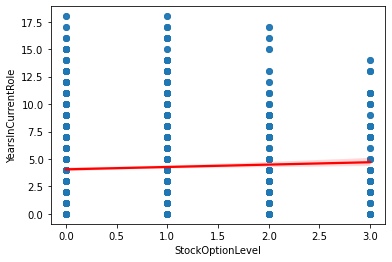

SpearmanrResult(correlation=0.0716269138419393, pvalue=0.00010145755186653338)
************************************************************
231 Regplot StockOptionLevel-YearsSinceLastPromotion


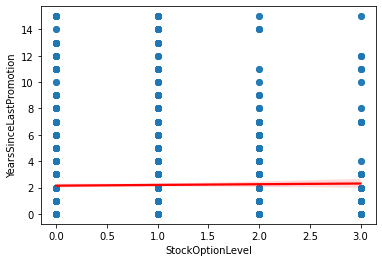

SpearmanrResult(correlation=0.02750239045426186, pvalue=0.13599404268890322)
************************************************************
232 Regplot StockOptionLevel-YearsWithCurrManager


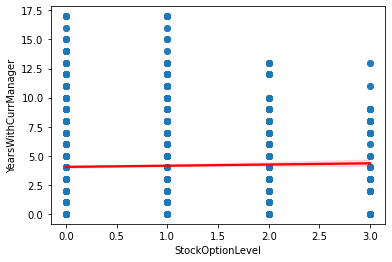

SpearmanrResult(correlation=0.05364618774775645, pvalue=0.003618344495066076)
************************************************************
233 Regplot TotalWorkingYears-TrainingTimesLastYear


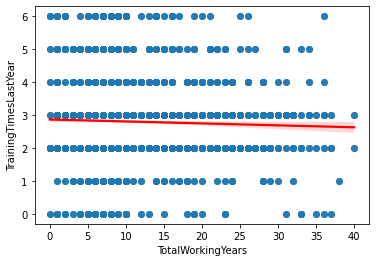

SpearmanrResult(correlation=-0.014150577504081238, pvalue=0.44309255738913433)
************************************************************
234 Regplot TotalWorkingYears-WorkLifeBalance


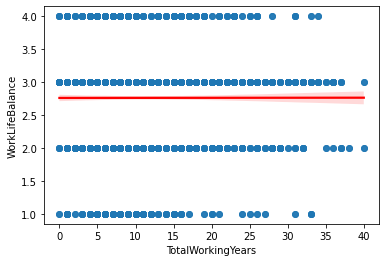

SpearmanrResult(correlation=0.003004073925814106, pvalue=0.8706622901757061)
************************************************************
235 Regplot TotalWorkingYears-YearsAtCompany


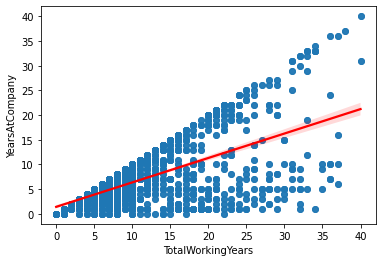

SpearmanrResult(correlation=0.5941932530497811, pvalue=3.5266088296286554e-280)
************************************************************
236 Regplot TotalWorkingYears-YearsInCurrentRole


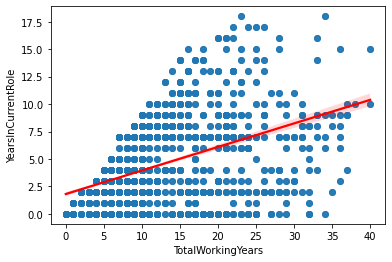

SpearmanrResult(correlation=0.4927213241597057, pvalue=1.1398452415999311e-179)
************************************************************
237 Regplot TotalWorkingYears-YearsSinceLastPromotion


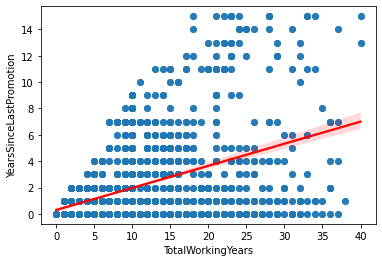

SpearmanrResult(correlation=0.33499564034684404, pvalue=5.020564464189116e-78)
************************************************************
238 Regplot TotalWorkingYears-YearsWithCurrManager


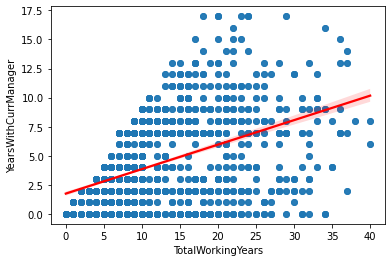

SpearmanrResult(correlation=0.4952541030022398, pvalue=8.767467032016229e-182)
************************************************************
239 Regplot TrainingTimesLastYear-WorkLifeBalance


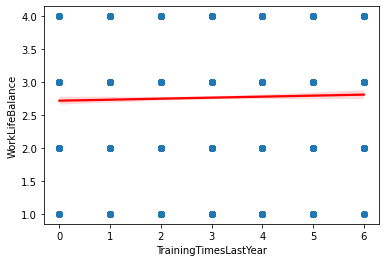

SpearmanrResult(correlation=0.023689557478749526, pvalue=0.19909870313513292)
************************************************************
240 Regplot TrainingTimesLastYear-YearsAtCompany


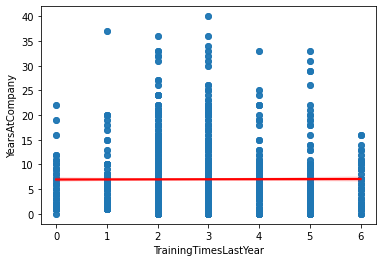

SpearmanrResult(correlation=0.0013893446989500773, pvalue=0.9399754445047762)
************************************************************
241 Regplot TrainingTimesLastYear-YearsInCurrentRole


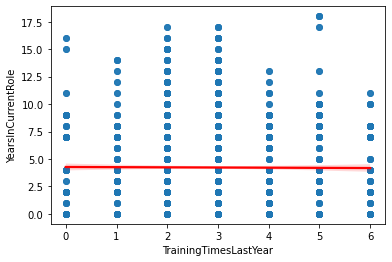

SpearmanrResult(correlation=0.004581056899978891, pvalue=0.8039110631518978)
************************************************************
242 Regplot TrainingTimesLastYear-YearsSinceLastPromotion


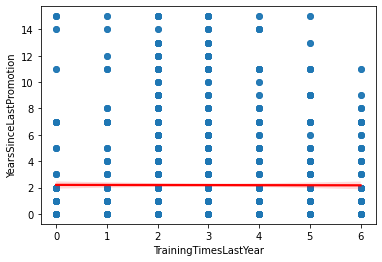

SpearmanrResult(correlation=0.010215434571595529, pvalue=0.5797993642457051)
************************************************************
243 Regplot TrainingTimesLastYear-YearsWithCurrManager


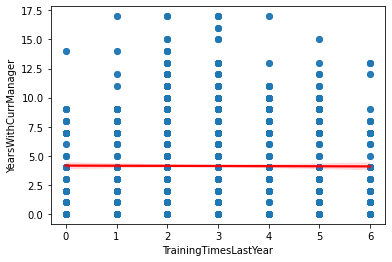

SpearmanrResult(correlation=-0.011627540754936615, pvalue=0.5285513105371829)
************************************************************
244 Regplot WorkLifeBalance-YearsAtCompany


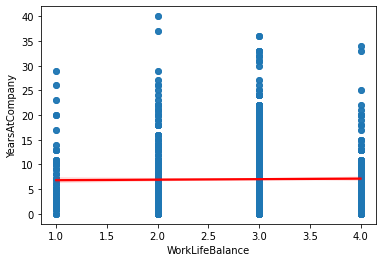

SpearmanrResult(correlation=0.004675134423995748, pvalue=0.7999686824425344)
************************************************************
245 Regplot WorkLifeBalance-YearsInCurrentRole


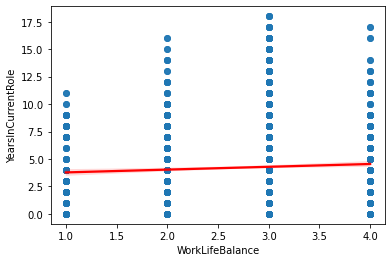

SpearmanrResult(correlation=0.02321426053163883, pvalue=0.20826429803250793)
************************************************************
246 Regplot WorkLifeBalance-YearsSinceLastPromotion


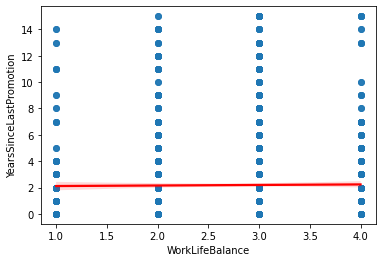

SpearmanrResult(correlation=0.002151110486416443, pvalue=0.9071869073761648)
************************************************************
247 Regplot WorkLifeBalance-YearsWithCurrManager


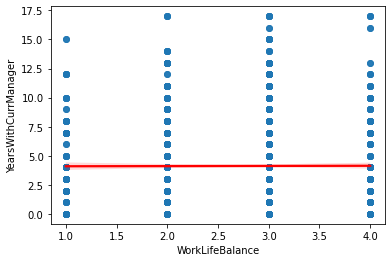

SpearmanrResult(correlation=-0.004590570131052262, pvalue=0.8035121764607134)
************************************************************
248 Regplot YearsAtCompany-YearsInCurrentRole


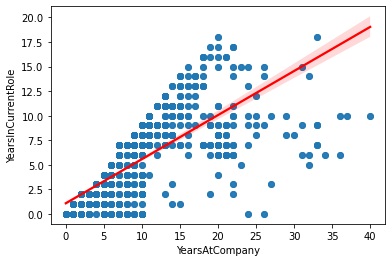

SpearmanrResult(correlation=0.8539995332892505, pvalue=0.0)
************************************************************
249 Regplot YearsAtCompany-YearsSinceLastPromotion


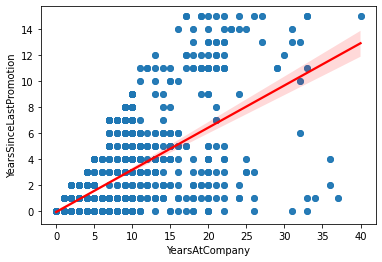

SpearmanrResult(correlation=0.5199664440864266, pvalue=2.2574937631789918e-203)
************************************************************
250 Regplot YearsAtCompany-YearsWithCurrManager


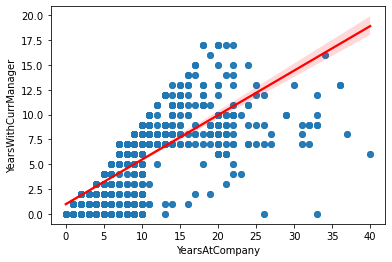

SpearmanrResult(correlation=0.8428033421828458, pvalue=0.0)
************************************************************
251 Regplot YearsInCurrentRole-YearsSinceLastPromotion


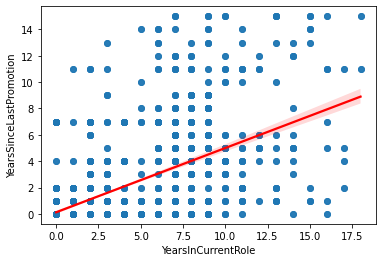

SpearmanrResult(correlation=0.5056565032149037, pvalue=1.1783936270957434e-190)
************************************************************
252 Regplot YearsInCurrentRole-YearsWithCurrManager


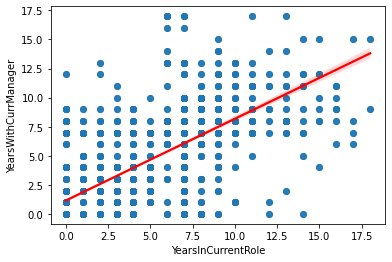

SpearmanrResult(correlation=0.7247542192761358, pvalue=0.0)
************************************************************
253 Regplot YearsSinceLastPromotion-YearsWithCurrManager


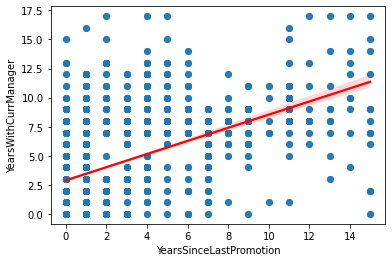

SpearmanrResult(correlation=0.4667127452145146, pvalue=5.823845014617715e-159)
************************************************************


In [22]:
done = [] #untuk menyimpan pasangan fitur yang sudah divisualisasikan
count = 1
for col_x in employee_used_num.columns:
    for col_y in employee_used_num.columns:
        #untuk menghindari pasangan [col_x, col_y] dan [col_y, col_x] dengan col_x=col_y dan col_y=col_x 
        #juga agar fitur yang sama tidak diplot terhadap dirinya sendiri
        if col_x != col_y and [col_y, col_x] not in done:
            print(f"{count} Regplot {col_x}-{col_y}")
            sns.regplot(data=employee_used_num, x=col_x, y=col_y, line_kws={'color':'red'})
            plt.show()
            #normal test
            stat_col_x, pvalue_col_x = st.normaltest(employee_used_num[col_x])
            stat_col_y, pvalue_col_y = st.normaltest(employee_used_num[col_y])
            #jika p-value kedua fitur lebih dari 0.05 maka lakukan pearson test, jika tidak maka lakukan spearman test
            if pvalue_col_x > 0.05 and pvalue_col_y > 0.05:
                print(st.pearsonr(employee_used_num[col_x], employee_used_num[col_y]))
            else:
                print(st.spearmanr(employee_used_num[col_x], employee_used_num[col_y]))
            #mengupdate data pada list done dengan urutan [x,y]
            done.append([col_x, col_y])
            count += 1
            print("*"*60)

(4) Lakukan EDA multivariat untuk pasangan kolom numerik dan kolom 'attrition' pada employee.csv yang mencakup:<p>
    a. boxplot (atau variasinya) dan pointplot antara semua kolom numerik dan kolom 'attrition'<p>
    b. confidence interval 95% nilai mean tiap fitur numerik untuk grup attrited dan grup existing.
    c. lakukan t-test (alpha = 5%) dan tuliskan kesimpulannya: <p> H(0): mean variabel numerik kelompok attrited = mean variabel numerik kelompok non-attrited; <p> H(1): mean variabel numerik kelompok attrited ≠ mean variabel numerik kelompok non-attrited

1 Age


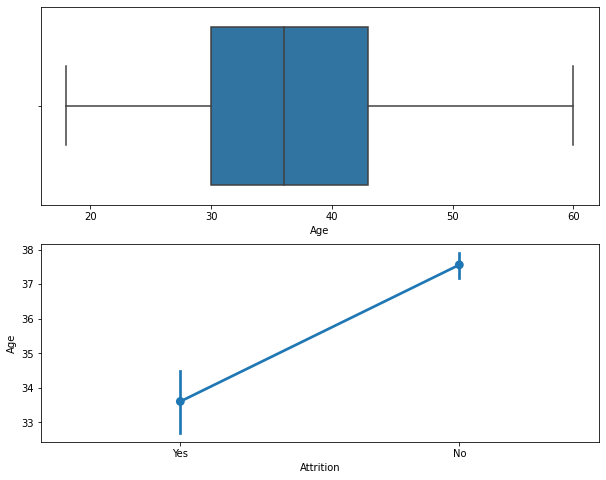

confidence interval nilai mean untuk fitur Age attrited employee dengan confidence level 95%: 32.734006889552006 - 34.48118298386572
confidence interval nilai mean untuk fitur Age existing employee dengan confidence level 95%: 37.21032063603133 - 37.91214489519332
p-value: 3.81593657708194e-18
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
2 DailyRate


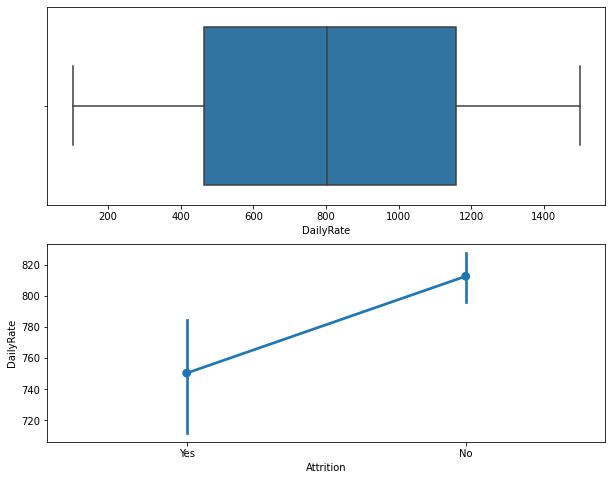

confidence interval nilai mean untuk fitur DailyRate attrited employee dengan confidence level 95%: 714.1277636334735 - 786.5979747631509
confidence interval nilai mean untuk fitur DailyRate existing employee dengan confidence level 95%: 796.5858085672672 - 828.4231127628219
p-value: 0.0021196621409025145
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
3 DistanceFromHome


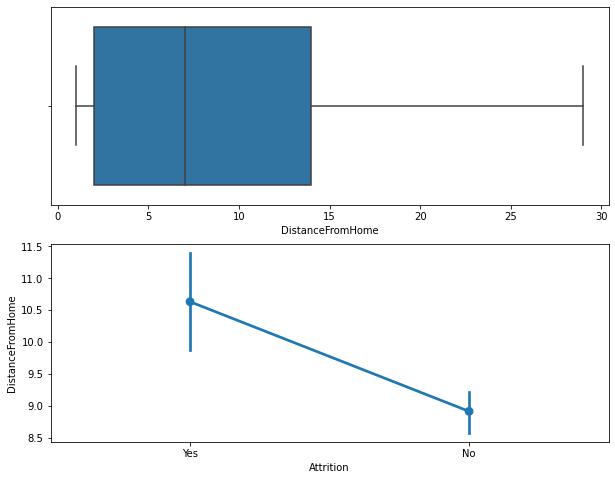

confidence interval nilai mean untuk fitur DistanceFromHome attrited employee dengan confidence level 95%: 9.870834976158307 - 11.39498780865182
confidence interval nilai mean untuk fitur DistanceFromHome existing employee dengan confidence level 95%: 8.599314401411826 - 9.231991356901231
p-value: 2.3390947201456238e-05
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
4 Education


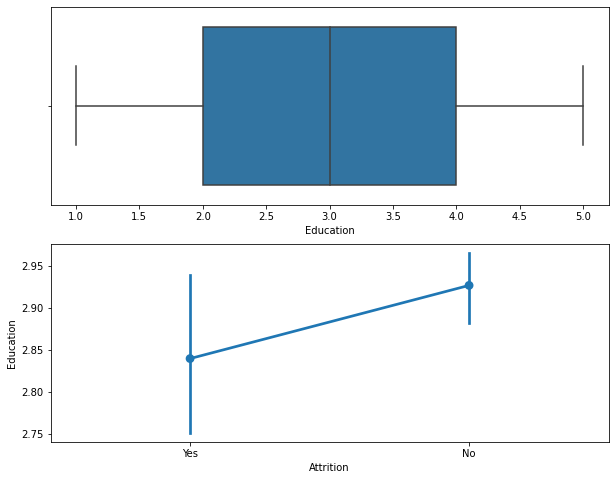

confidence interval nilai mean untuk fitur Education attrited employee dengan confidence level 95%: 2.7487595638456876 - 2.9305653306690806
confidence interval nilai mean untuk fitur Education existing employee dengan confidence level 95%: 2.886461306072162 - 2.9675532924679837
p-value: 0.08898337616197098
Gagal menolak H0, mean variabel numerik attrited = mean variabel numerik non-attrited
5 EnvironmentSatisfaction


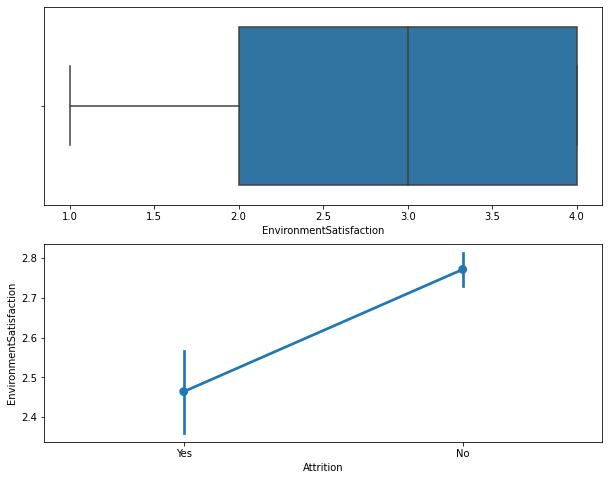

confidence interval nilai mean untuk fitur EnvironmentSatisfaction attrited employee dengan confidence level 95%: 2.3586670905974363 - 2.5696029515966567
confidence interval nilai mean untuk fitur EnvironmentSatisfaction existing employee dengan confidence level 95%: 2.729001273821337 - 2.813577801604454
p-value: 1.9371929669348265e-08
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
6 HourlyRate


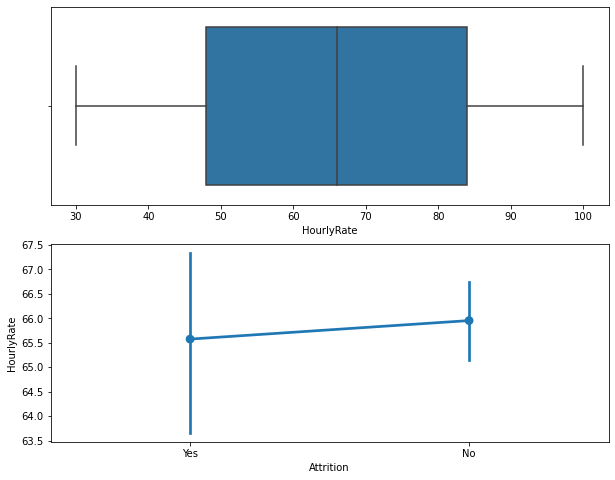

confidence interval nilai mean untuk fitur HourlyRate attrited employee dengan confidence level 95%: 63.761635241805706 - 67.3860440830888
confidence interval nilai mean untuk fitur HourlyRate existing employee dengan confidence level 95%: 65.14751779540406 - 66.75678066363893
p-value: 0.7106194362611045
Gagal menolak H0, mean variabel numerik attrited = mean variabel numerik non-attrited
7 JobInvolvement


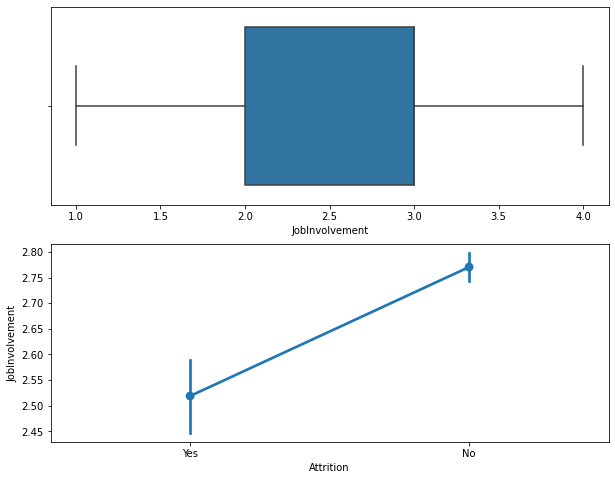

confidence interval nilai mean untuk fitur JobInvolvement attrited employee dengan confidence level 95%: 2.449257468280031 - 2.588717215264273
confidence interval nilai mean untuk fitur JobInvolvement existing employee dengan confidence level 95%: 2.743156405610766 - 2.7978006097988044
p-value: 1.4757093226921348e-12
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
8 JobLevel


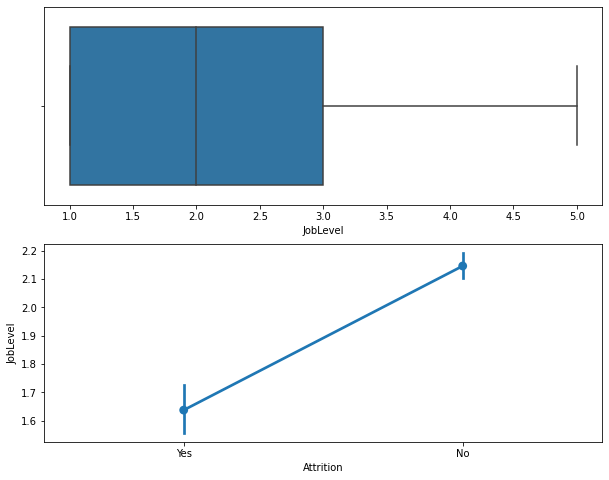

confidence interval nilai mean untuk fitur JobLevel attrited employee dengan confidence level 95%: 1.5523272056389135 - 1.721934397736614
confidence interval nilai mean untuk fitur JobLevel existing employee dengan confidence level 95%: 2.1018494356069946 - 2.190121367312713
p-value: 2.660734938928856e-20
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
9 JobSatisfaction


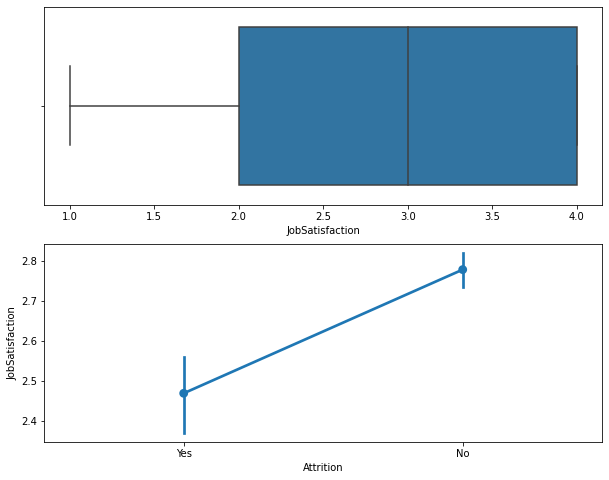

confidence interval nilai mean untuk fitur JobSatisfaction attrited employee dengan confidence level 95%: 2.367550754801288 - 2.569158105958205
confidence interval nilai mean untuk fitur JobSatisfaction existing employee dengan confidence level 95%: 2.735426255891551 - 2.821751359680225
p-value: 1.869684612172801e-08
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
10 MonthlyIncome


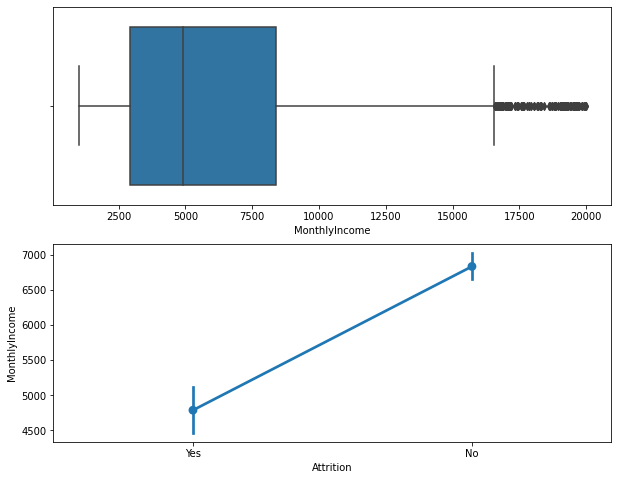

confidence interval nilai mean untuk fitur MonthlyIncome attrited employee dengan confidence level 95%: 4458.892865171486 - 5115.292788836953
confidence interval nilai mean untuk fitur MonthlyIncome existing employee dengan confidence level 95%: 6642.516983241724 - 7022.962335493069
p-value: 2.8014343779530075e-18
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
11 MonthlyRate


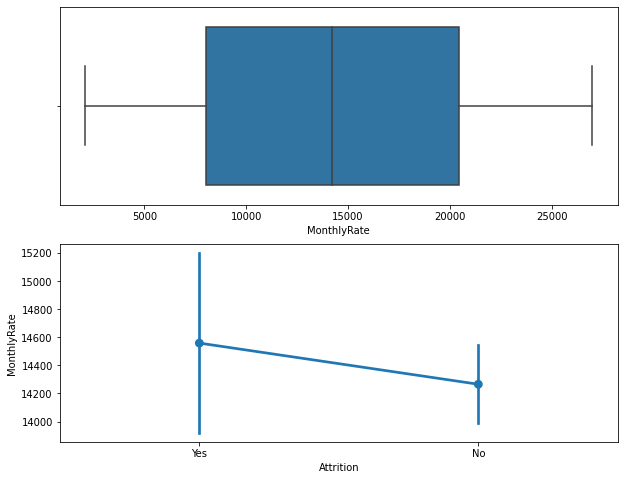

confidence interval nilai mean untuk fitur MonthlyRate attrited employee dengan confidence level 95%: 13909.423700439413 - 15209.192333315863
confidence interval nilai mean untuk fitur MonthlyRate existing employee dengan confidence level 95%: 13985.38240451051 - 14546.17639516508
p-value: 0.4109327811267489
Gagal menolak H0, mean variabel numerik attrited = mean variabel numerik non-attrited
12 NumCompaniesWorked


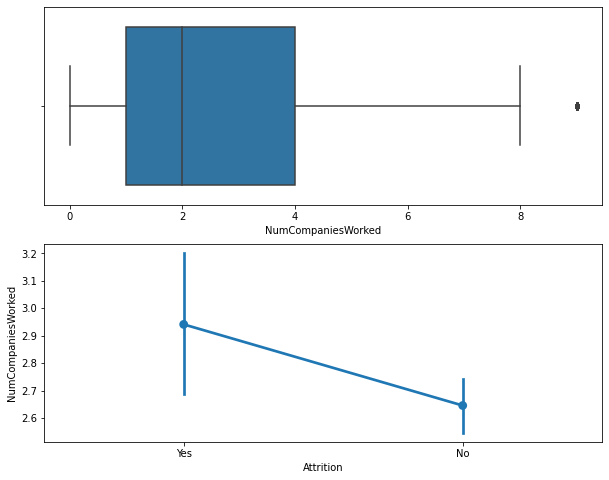

confidence interval nilai mean untuk fitur NumCompaniesWorked attrited employee dengan confidence level 95%: 2.6994340675269433 - 3.1824224725574446
confidence interval nilai mean untuk fitur NumCompaniesWorked existing employee dengan confidence level 95%: 2.5484556121061424 - 2.742704160805455
p-value: 0.01835289004355661
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
13 PercentSalaryHike


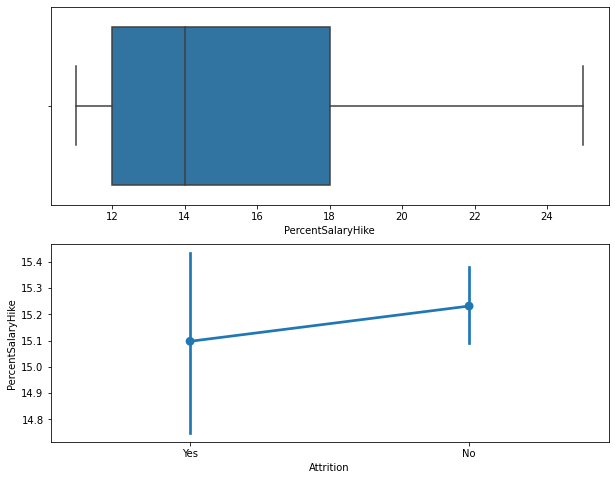

confidence interval nilai mean untuk fitur PercentSalaryHike attrited employee dengan confidence level 95%: 14.757118143457395 - 15.436974683546824
confidence interval nilai mean untuk fitur PercentSalaryHike existing employee dengan confidence level 95%: 15.087455780154086 - 15.374831324468785
p-value: 0.4650636367687475
Gagal menolak H0, mean variabel numerik attrited = mean variabel numerik non-attrited
14 PerformanceRating


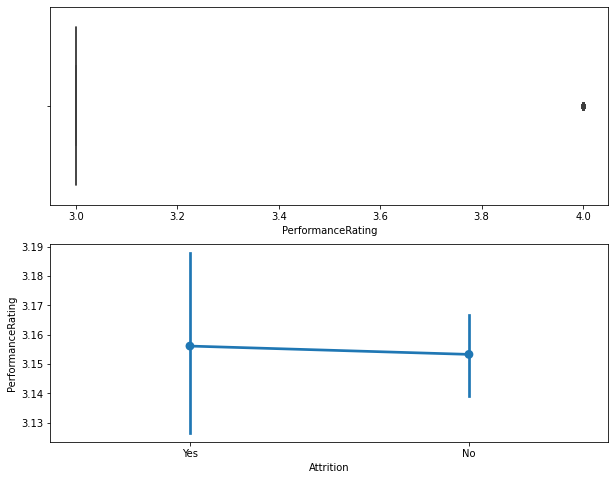

confidence interval nilai mean untuk fitur PerformanceRating attrited employee dengan confidence level 95%: 3.1233238914727286 - 3.188912395447103
confidence interval nilai mean untuk fitur PerformanceRating existing employee dengan confidence level 95%: 3.13905578218805 - 3.167513560877644
p-value: 0.8755861595131667
Gagal menolak H0, mean variabel numerik attrited = mean variabel numerik non-attrited
15 RelationshipSatisfaction


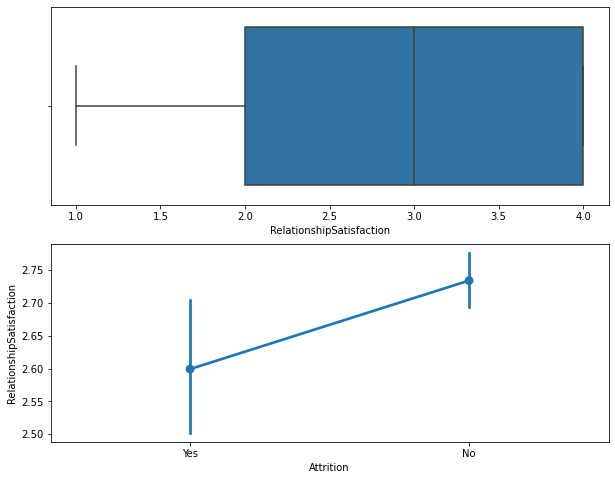

confidence interval nilai mean untuk fitur RelationshipSatisfaction attrited employee dengan confidence level 95%: 2.4976871119721915 - 2.700625124314728
confidence interval nilai mean untuk fitur RelationshipSatisfaction existing employee dengan confidence level 95%: 2.6916753114160827 - 2.7762890032635608
p-value: 0.01286344234047693
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
16 StockOptionLevel


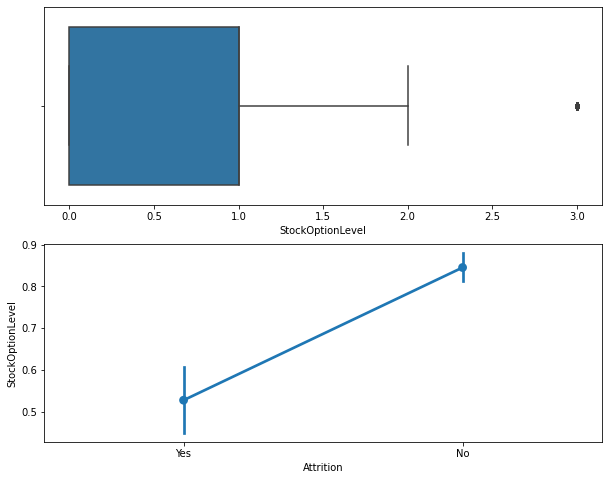

confidence interval nilai mean untuk fitur StockOptionLevel attrited employee dengan confidence level 95%: 0.45021695013854346 - 0.604635370536562
confidence interval nilai mean untuk fitur StockOptionLevel existing employee dengan confidence level 95%: 0.811851725914017 - 0.8783348109878484
p-value: 8.118139089061158e-14
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
17 TotalWorkingYears


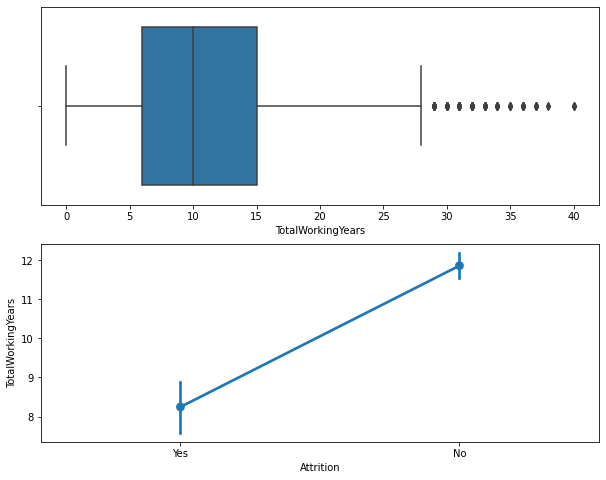

confidence interval nilai mean untuk fitur TotalWorkingYears attrited employee dengan confidence level 95%: 7.598353093542831 - 8.89109838325042
confidence interval nilai mean untuk fitur TotalWorkingYears existing employee dengan confidence level 95%: 11.556543016096901 - 12.169328841161816
p-value: 9.603230829038467e-21
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
18 TrainingTimesLastYear


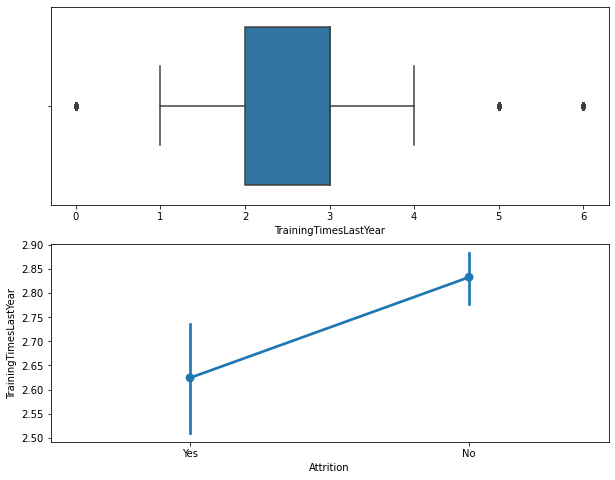

confidence interval nilai mean untuk fitur TrainingTimesLastYear attrited employee dengan confidence level 95%: 2.511341717766789 - 2.737603429912536
confidence interval nilai mean untuk fitur TrainingTimesLastYear existing employee dengan confidence level 95%: 2.781857117834228 - 2.8839985188243284
p-value: 0.0012532455739241968
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
19 WorkLifeBalance


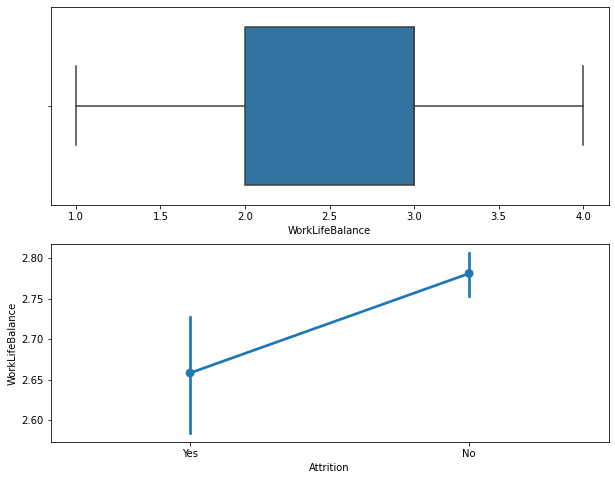

confidence interval nilai mean untuk fitur WorkLifeBalance attrited employee dengan confidence level 95%: 2.58461678003717 - 2.7318389161653616
confidence interval nilai mean untuk fitur WorkLifeBalance existing employee dengan confidence level 95%: 2.7541002480588386 - 2.8079435475615995
p-value: 0.000522470239713935
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
20 YearsAtCompany


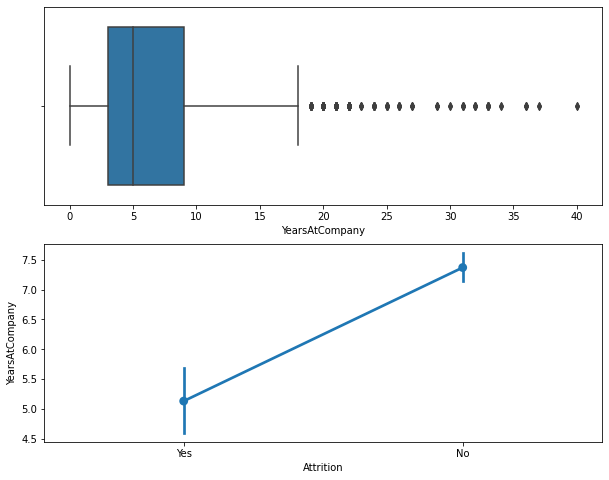

confidence interval nilai mean untuk fitur YearsAtCompany attrited employee dengan confidence level 95%: 4.594353423966238 - 5.667249951561189
confidence interval nilai mean untuk fitur YearsAtCompany existing employee dengan confidence level 95%: 7.1283370253132725 - 7.609700282067101
p-value: 2.533866631551603e-13
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
21 YearsInCurrentRole


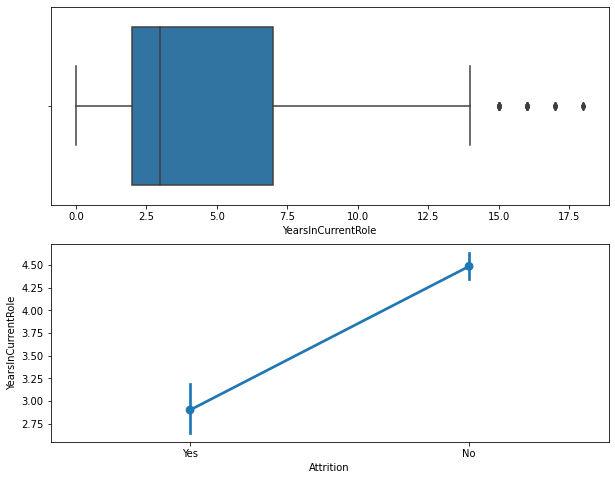

confidence interval nilai mean untuk fitur YearsInCurrentRole attrited employee dengan confidence level 95%: 2.6167124284969314 - 3.1891947444988493
confidence interval nilai mean untuk fitur YearsInCurrentRole existing employee dengan confidence level 95%: 4.340106659900868 - 4.628263169782831
p-value: 1.9839511760303274e-18
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited
22 YearsSinceLastPromotion


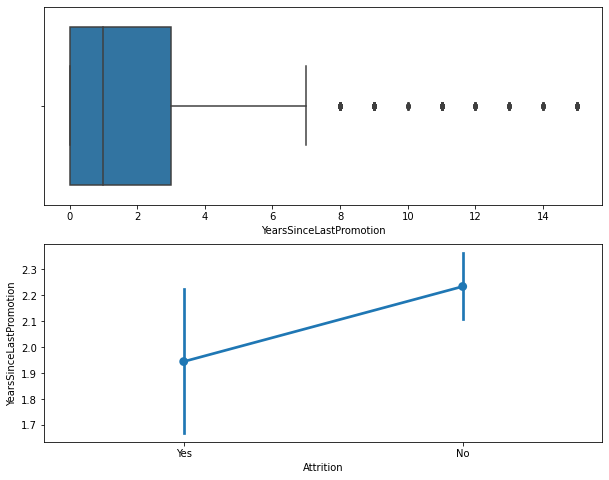

confidence interval nilai mean untuk fitur YearsSinceLastPromotion attrited employee dengan confidence level 95%: 1.6608674858781316 - 2.2294278727716574
confidence interval nilai mean untuk fitur YearsSinceLastPromotion existing employee dengan confidence level 95%: 2.106679377654564 - 2.36209596703319
p-value: 0.07344377612528463
Gagal menolak H0, mean variabel numerik attrited = mean variabel numerik non-attrited
23 YearsWithCurrManager


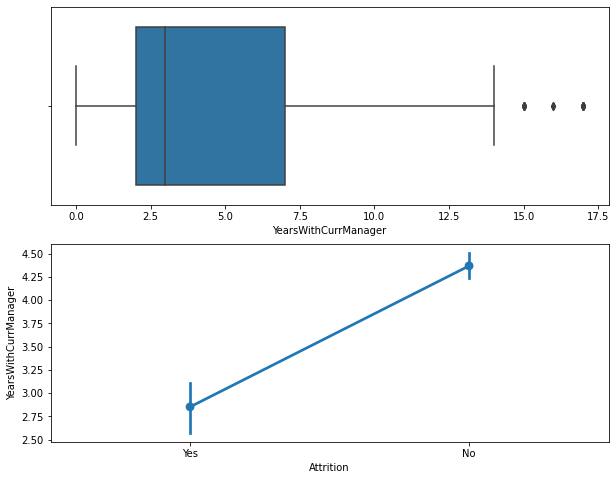

confidence interval nilai mean untuk fitur YearsWithCurrManager attrited employee dengan confidence level 95%: 2.5689175733217504 - 3.1357237768892197
confidence interval nilai mean untuk fitur YearsWithCurrManager existing employee dengan confidence level 95%: 4.225501024541733 - 4.5092921628062
p-value: 1.6214423296814803e-17
H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited


In [43]:
for en, num_col in enumerate(employee_used_num.columns):
    print(en+1, num_col)
    #visualisasi
    fig, ax = plt.subplots(2,1, figsize = (10,8))
    sns.boxplot(data=employee_used_num, x=num_col, ax=ax[0])
    sns.pointplot(data=employee_used, x='Attrition', y=num_col, ax=ax[1])
    plt.show()
    #filter untuk attrition
    att = employee_used['Attrition'] == 'Yes'
    exist = employee_used['Attrition'] == 'No'
    #confidence interval untuk attrited employee
    ci_att = st.t.interval(alpha=0.95,
    df = len(employee_used[num_col][att]) - 1,
    loc = np.mean(employee_used[num_col][att]), 
    scale = employee_used[num_col][att].std()/(len(employee_used[num_col][att])**0.5))
    print(f"confidence interval nilai mean untuk fitur {num_col} attrited employee dengan confidence level 95%: {ci_att[0]} - {ci_att[1]}")
    #confidence interval untuk existing employee
    ci_ex = st.t.interval(alpha=0.95,
    df = len(employee_used[num_col][exist]) - 1,
    loc = np.mean(employee_used[num_col][exist]), 
    scale = employee_used[num_col][exist].std()/(len(employee_used[num_col][exist])**0.5))
    print(f"confidence interval nilai mean untuk fitur {num_col} existing employee dengan confidence level 95%: {ci_ex[0]} - {ci_ex[1]}")
    #t-test
    stat, p_val = st.ttest_ind(employee_used[num_col][att],  employee_used[num_col][exist])
    if p_val > 0.05:
        print(f"p-value: {p_val}")
        print(f"Gagal menolak H0, mean variabel numerik attrited = mean variabel numerik non-attrited")
    else:
        print(f"p-value: {p_val}")
        print(f"H0 ditolak, mean variabel numerik attrited != mean variable numerik non-attrited")
    print("="*60)


(5) Lakukan EDA multivariat untuk pasangan kolom kategorikal dan kolom 'attrition' pada employee.csv yang mencakup:<p>
    a. countplot untuk tiap kolom kategorikal dengan kolom 'attrition' sebagai hue <p>
    b. stacked barplot yang menunjukkan proporsi value pada kolom 'attrition' untuk tiap kolom kategorikal<p>

2 BusinessTravel


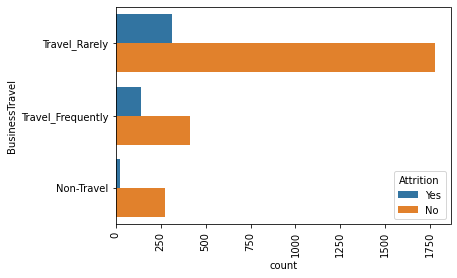

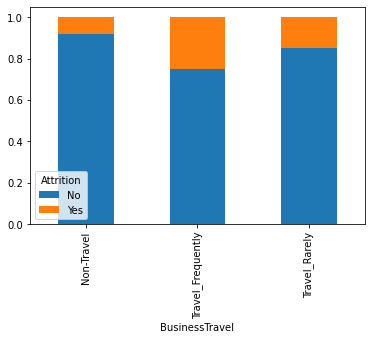

3 Department


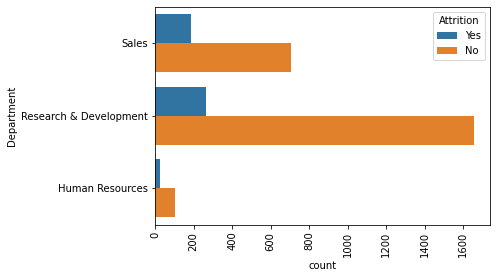

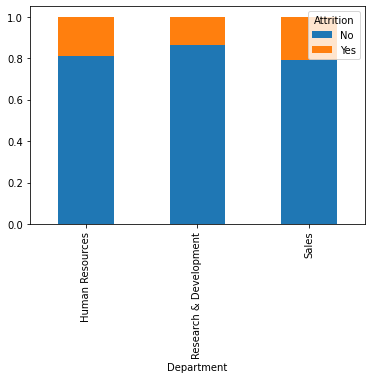

4 EducationField


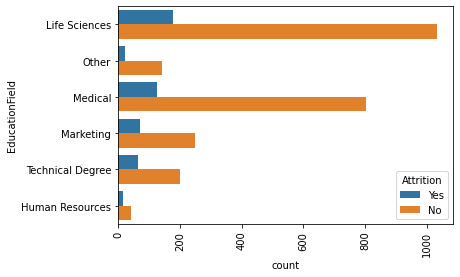

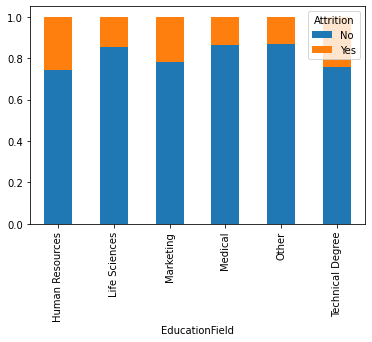

5 Gender


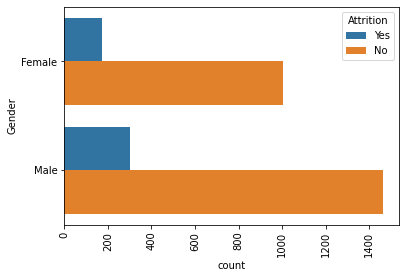

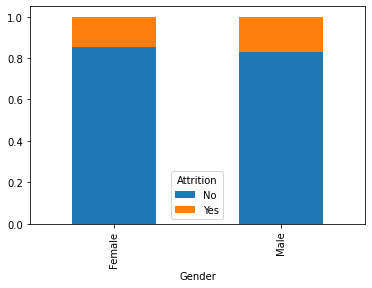

6 JobRole


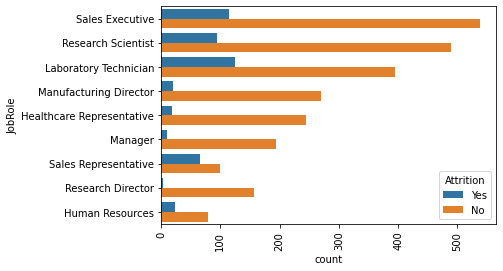

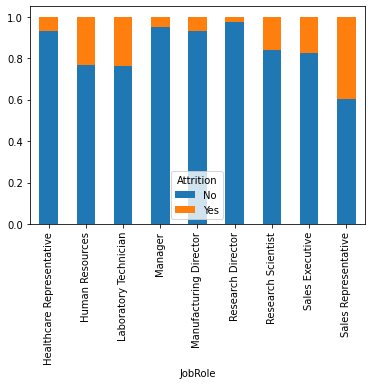

7 MaritalStatus


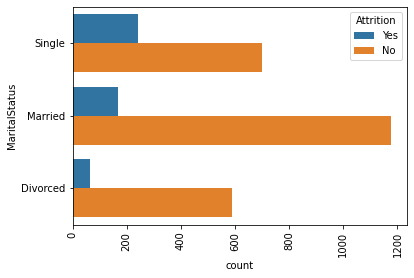

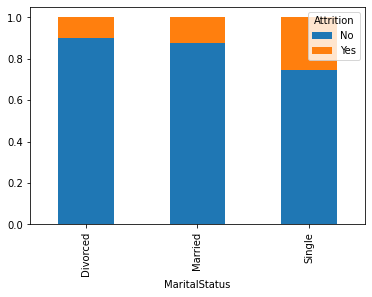

8 OverTime


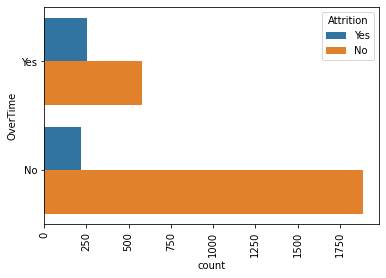

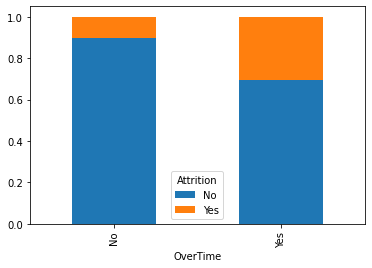

In [51]:
for en, obj_col in enumerate(employee_used_obj.columns):
    if obj_col != 'Attrition':
        print(en+1, obj_col)
        #membuat countplot
        sns.countplot(data=employee_used, y=obj_col, hue='Attrition')
        plt.xticks(rotation=90)
        #membuat stackedbar plot
        ct = pd.crosstab(index=employee_used[obj_col], columns=employee_used['Attrition'], normalize='index')
        ct.plot(kind='bar', stacked=True)
        plt.show()
        print("="*60)
        

(6) Buat FacetGrid:<p>
a. Pointplot (x: BusinessTravel, y: HourlyRate), row: attrition, col: gender <p>
b. Kdeplot (x: PercentSalaryHike, y: HourlyRate), row: attrition, col: EducationField 

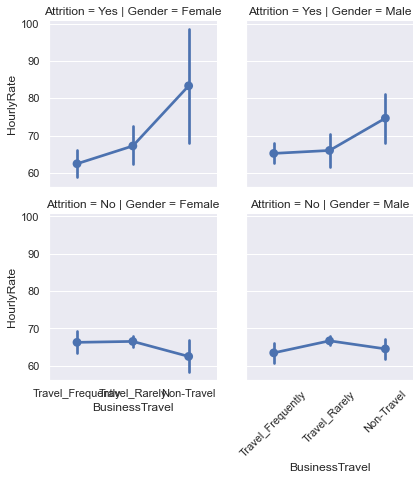

In [66]:
sns.set(font_scale=1)
fg = sns.FacetGrid(data=employee_used, row='Attrition', col='Gender')
fg.map_dataframe(sns.pointplot, x='BusinessTravel', y='HourlyRate')
plt.xticks(rotation=45)
plt.show()

(7) Tuliskan insights (pelajaran atau hal menarik) yang Anda dapatkan dari EDA yang telah Anda lakukan. (Minimal 5 insights)